In [2]:
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns

In [3]:
path = "./Asset List - Air Handling Unit.xlsx"
path_spare_issued_cm = "./Spare_Issued_CM.xlsx"
path_spare_issued_pm = "./Spare_Issued_PM.xlsx"
path_work_order_cm = "./Work_Order_CM.xlsx"
path_work_order_pm = "./Work_Order_PM.xlsx"

In [5]:
df = pd.read_excel(path)
df

,CONTRACTOR,ASSET NUMBER,ASSET GROUP,DEPARTMENT
0,FM008,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,HVAC
1,FM008,ASD-COA-APR-AHU078,AIR HANDLING UNIT-05,HVAC
2,FM008,ASD-COA-BAS004-AHU182,AIR HANDLING UNIT-05,HVAC
3,FM008,ASD-COAE-L0A4A-AHU1,AIR HANDLING UNIT-05,HVAC
4,FM008,ASD-COA-FFL1-AHU101,AIR HANDLING UNIT-05,HVAC
...,...,...,...,...
209,FM008,LSD-PMS-BUI-AHU202,AIR HANDLING UNIT-01,HVAC
210,FM008,LSD-PMS-BUI-AHU203,AIR HANDLING UNIT-01,HVAC
211,FM008,LSD-TXP-GFL26A-AHU201,AIR HANDLING UNIT-05,HVAC
212,FM008,LSD-VCN-FFL-AHU198,AIR HANDLING UNIT-05,HVAC


- CONTRACTOR: Identifies the contractor responsible for maintaining the asset.
- ASSET NUMBER: Unique identifier for the asset.
- ASSET GROUP: The category or type of the asset (e.g., "AIR HANDLING UNIT-05").
- DEPARTMENT: The department responsible for the asset, likely "HVAC" in this context.

In [6]:
spare_issued_cm = pd.read_excel(path_spare_issued_cm)
spare_issued_pm = pd.read_excel(path_spare_issued_pm)
work_order_cm = pd.read_excel(path_work_order_cm)
work_order_pm = pd.read_excel(path_work_order_pm)

In [26]:
print(spare_issued_cm.columns)
spare_issued_cm.head()

Index(['ITEM NAME', 'ITEM DESCRIPTION', 'ITEM ISSUE DATE', 'MAJOR CATEGORY',
       'MINOR CATEGORY', 'WORK ORDER NUMBER', 'ASSET NUMBER', 'ASSET GROUP',
       'MAKE MODEL', 'ACTIVITY CODE', 'CREATION DATE', 'QUANTITY',
       'TOTAL VALUE', 'YearMonth'],
      dtype='object')


,ITEM NAME,ITEM DESCRIPTION,ITEM ISSUE DATE,MAJOR CATEGORY,MINOR CATEGORY,WORK ORDER NUMBER,ASSET NUMBER,ASSET GROUP,MAKE MODEL,ACTIVITY CODE,CREATION DATE,QUANTITY,TOTAL VALUE,YearMonth
0,HVC-FLR-733,"BAG FILTER - 10 POCKET, CLASS: F7, MERV RATING...",2022-01-02 15:12:07,HVAC,FILTER,CM-2022-9963316,ASD-MTB-FOF011-AHU033,AIR HANDLING UNIT-05,KLIMAK / KCD200,NaN,02-Jan-2022 12:09:57,6,1698.78,2022-01
1,HVC-FLR-734,"BAG FILTER - 5 POCKET, CLASS: F7, MERV RATING ...",2022-01-02 15:12:07,HVAC,FILTER,CM-2022-9963316,ASD-MTB-FOF011-AHU033,AIR HANDLING UNIT-05,KLIMAK / KCD200,NaN,02-Jan-2022 12:09:57,2,345.46,2022-01
2,HVC-FLR-736,"DUST FILTER - CLASS: G4, MERV RATING - 8, ISO ...",2022-01-02 15:12:07,HVAC,FILTER,CM-2022-9963316,ASD-MTB-FOF011-AHU033,AIR HANDLING UNIT-05,KLIMAK / KCD200,NaN,02-Jan-2022 12:09:57,2,54.24,2022-01
3,HVC-FLR-743,"DUST FILTER - CLASS: G4, MERV RATING - 8, ISO ...",2022-01-02 15:12:07,HVAC,FILTER,CM-2022-9963316,ASD-MTB-FOF011-AHU033,AIR HANDLING UNIT-05,KLIMAK / KCD200,NaN,02-Jan-2022 12:09:57,6,209.58,2022-01
4,HVC-FLR-733,"BAG FILTER - 10 POCKET, CLASS: F7, MERV RATING...",2022-01-02 15:13:29,HVAC,FILTER,CM-2022-9964128,ASD-MTB-GFL009-AHU007,AIR HANDLING UNIT-05,KLIMAK / KCD065,NaN,02-Jan-2022 12:56:40,2,566.26,2022-01


why the item issue data is after the creation date

- ITEM NAME: The name of the spare part issued.
- ITEM DESCRIPTION: Detailed description of the spare part.
- ITEM ISSUE DATE: Date and time when the spare part was issued.
- MAJOR CATEGORY: Broad category of the item (e.g., "HVAC").
- MINOR CATEGORY: More specific categorization within the major category (e.g., "FILTER").
- WORK ORDER NUMBER: The number associated with the work order requiring the spare.
- ASSET NUMBER: The specific asset associated with this spare part.
- ASSET GROUP: The group/type of the asset.
- MAKE: Manufacturer or brand of the asset.
- MODEL: Specific model of the asset.
- ACTIVITY CODE: Code representing the activity associated with the work order (if available).
- CREATION DATE: Date and time when the entry was created in the system.
- QUANTITY: Quantity of the spare part issued.
- TOTAL VALUE: Total monetary value of the issued spare parts.

In [24]:
print(spare_issued_pm.columns)
spare_issued_pm.head()

Index(['CONTRACTOR', 'DEPARTMENT', 'ITEM NAME', 'ITEM DESCRIPTION',
       'ITEM ISSUE DATE', 'MAJOR CATEGORY', 'MINOR CATEGORY',
       'WORK ORDER NUMBER', 'ASSET NUMBER', 'ASSET GROUP', 'MAKE MODEL',
       'ACTIVITY CODE', 'TARGET RESPONSE DATE', 'QUANTITY', 'TOTAL VALUE',
       'YearMonth'],
      dtype='object')


,CONTRACTOR,DEPARTMENT,ITEM NAME,ITEM DESCRIPTION,ITEM ISSUE DATE,MAJOR CATEGORY,MINOR CATEGORY,WORK ORDER NUMBER,ASSET NUMBER,ASSET GROUP,MAKE MODEL,ACTIVITY CODE,TARGET RESPONSE DATE,QUANTITY,TOTAL VALUE,YearMonth
0,FM008,HVAC,HVC-FLR-736,"DUST FILTER - CLASS: G4, MERV RATING - 8, ISO ...",2022-01-01 22:12:10,HVAC,FILTER,PM-2021-9889138,ASD-MTB-GFL007-AHU001,AIR HANDLING UNIT-05,KLIMAK / KCD160,3M-AIR HANDLING UNIT-05,27-Dec-2021 00:00:00,3,81.36,2022-01
1,FM008,HVAC,HVC-FLR-743,"DUST FILTER - CLASS: G4, MERV RATING - 8, ISO ...",2022-01-01 22:12:10,HVAC,FILTER,PM-2021-9889138,ASD-MTB-GFL007-AHU001,AIR HANDLING UNIT-05,KLIMAK / KCD160,3M-AIR HANDLING UNIT-05,27-Dec-2021 00:00:00,3,104.79,2022-01
2,FM008,HVAC,MCL-BLT-013,V-BELT A-38,2022-01-01 22:44:21,MECHANICAL,BELT,PM-2021-9893310,ASD-COB-SFL016-AHU093,AIR HANDLING UNIT-05,KLIMAK / KCD105,3M-AIR HANDLING UNIT-05,03-Jan-2022 00:00:00,2,36.00,2022-01
3,FM008,HVAC,HVC-BLT-432,BELT-SPA807,2022-01-04 10:17:54,HVAC,BELT,PM-2021-9893550,ASD-COC-TFL001-AHU128,AIR HANDLING UNIT-05,KLIMAK / KCD160,Y-AIR HANDLING UNIT-05,04-Jan-2022 00:00:00,2,40.00,2022-01
4,FM008,HVAC,HVC-BLT-402,BELT-SPA1400,2022-01-04 10:17:54,HVAC,BELT,PM-2021-9893550,ASD-COC-TFL001-AHU128,AIR HANDLING UNIT-05,KLIMAK / KCD160,Y-AIR HANDLING UNIT-05,04-Jan-2022 00:00:00,3,120.00,2022-01


In [23]:
print(work_order_cm.columns)
work_order_cm.head()

Index(['Assign', 'Work Order', 'Asset Number', 'Asset Group', 'Description',
       'Target Time', 'Contractor', 'Parent Asset Group',
       'Creation Date & Time', 'Target Response Date & Time',
       'Target Resolution Date & Time', 'Target Duration (Hours)',
       'Actual Response Date & Time', 'Actual Resolution Date & Time',
       'Actual Duration (Minutes)', 'Actual Operation Time(Minutes)',
       'Technicians Count', 'Owning Department', 'Work Order Department',
       'Status', 'Priority', 'Location', 'Life & Safety Asset', 'Failure Code',
       'Cause Code', 'Resolution Code', 'Created By', 'Last updated by',
       'Update Work Order', 'Complete Work Order', 'Requestor Staff Id',
       'Requestor Name', 'QA Review Comments', 'Remarks', 'Mode of Reporting',
       'Time to Complete'],
      dtype='object')


,Assign,Work Order,Asset Number,Asset Group,Description,Target Time,Contractor,Parent Asset Group,Creation Date & Time,Target Response Date & Time,...,Created By,Last updated by,Update Work Order,Complete Work Order,Requestor Staff Id,Requestor Name,QA Review Comments,Remarks,Mode of Reporting,Time to Complete
0,NaN,CM-2022-10910218,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,AC TOO COLD (MIST FORMING ON GLASS AFFECTING V...,NaN,FM008,NaN,2022-08-05 21:49:11,2022-08-05 22:49:12,...,121959,55709,NaN,NaN,99323,"Vaddalapu, Mr. Ravitheja",N - - -,NaN,Voice Communication,0 days 01:00:01
1,NaN,CM-2022-10912161,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,AC TOO WARM A5-01-02,NaN,FM008,NaN,2022-08-06 05:31:06,2022-08-06 06:31:06,...,106972,55709,NaN,NaN,55137,"Lazaro, Mr. Mark Anthony Jocson",N - - -,NaN,Voice Communication,0 days 01:00:00
2,NaN,CM-2022-11260138,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,RAMP CONTROL TOWER A 6TH FLOOR - AC TOO COLD,NaN,FM008,NaN,2022-12-11 01:53:28,2022-12-11 02:53:28,...,89127,17053,NaN,NaN,60309,"Tuwei, Ms. Vivian Cheptoo",N - - -,NaN,Voice Communication,0 days 01:00:00
3,NaN,CM-2023-12273960,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,ABNORMAL SOUND FROM AHU – RCT CON A,NaN,FM008,NaN,2023-10-10 08:50:13,2023-10-10 09:50:13,...,105233,87807,NaN,NaN,FM3316,"Jose, Mr. Bibin",N - - -,NaN,Voice Communication,0 days 01:00:00
4,NaN,CM-2023-12507897,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,AHU HEATER NOT WORKING :AHU-A1121-701,NaN,FM008,NaN,2023-12-27 12:17:47,2023-12-27 13:17:47,...,106972,17053,NaN,NaN,FM8715,"Torino, Mr. Joriken Villondo",N - - -,NaN,Voice Communication,0 days 01:00:00


- Work Order Number: A unique identifier for the work order.
- Work Order Status: Status of the work order (e.g., "Completed").
- Work Order Description: Description of the work order task.
- Location: Where the work is taking place.
- Work Order Type: Whether the work order is preventive or corrective maintenance.
- Priority: Priority level of the work order (e.g., "Urgent").
- Asset Number: The asset involved in the work order.
- Asset Group: Type of asset involved.
- Department: The department responsible for the work order.
- Creation Date & Time: Date and time the work order was created.
- Target Response Date & Time: The targeted response time for the work order.
- Target Completion Date & Time: The targeted completion time for the work order.
- Actual Completion Date & Time: The actual time the work order was completed.
- Resolution Code: Code or description of the resolution applied to close the work order.
- Remarks: Additional comments or observations.
- Mode of Reporting: How the issue was reported (e.g., "Voice Communication")

In [27]:
print(work_order_pm.columns)
work_order_pm.head()

Index(['Assign', 'Work Order', 'Asset Number', 'Asset Group', 'Description',
       'Target Time', 'Contractor', 'Parent Asset Group',
       'Creation Date & Time', 'Target Response Date & Time',
       'Target Resolution Date & Time', 'Target Duration (Hours)',
       'Actual Response Date & Time', 'Actual Resolution Date & Time',
       'Actual Duration (Minutes)', 'Actual Operation Time(Minutes)',
       'Technicians Count', 'Owning Department', 'Work Order Department',
       'Status', 'Priority', 'Location', 'Life & Safety Asset', 'Failure Code',
       'Cause Code', 'Resolution Code', 'Created By', 'Last updated by',
       'Update Work Order', 'Complete Work Order', 'Requestor Staff Id',
       'Requestor Name', 'QA Review Comments', 'Remarks', 'Mode of Reporting',
       'Time to Complete'],
      dtype='object')


,Assign,Work Order,Asset Number,Asset Group,Description,Target Time,Contractor,Parent Asset Group,Creation Date & Time,Target Response Date & Time,...,Created By,Last updated by,Update Work Order,Complete Work Order,Requestor Staff Id,Requestor Name,QA Review Comments,Remarks,Mode of Reporting,Time to Complete
0,NaN,PM-2022-11212786,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,MONTHLY PREVENTIVE MAINTENANCE OF AIR HANDLING...,180|2,FM008,NaN,2022-11-21 10:34:58,2022-11-29,...,62079,62079,NaN,NaN,NaN,NaN,- - -,ECR1568_FIFA OPTIMIZATION,NaN,7 days 13:25:02
1,NaN,PM-2021-9893303,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,3 MONTHLY PREVENTIVE MAINTENANCE OF AIR HANDLI...,240|2,FM008,NaN,2021-12-13 11:19:34,2022-01-03,...,107626,107626,NaN,NaN,NaN,NaN,- - -,NaN,NaN,20 days 12:40:26
2,NaN,PM-2022-10076715,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,MONTHLY PREVENTIVE MAINTENANCE OF AIR HANDLING...,180|2,FM008,NaN,2022-01-23 11:18:21,2022-02-02,...,107626,107626,NaN,NaN,NaN,NaN,- - -,NaN,NaN,9 days 12:41:39
3,NaN,PM-2022-10150063,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,MONTHLY PREVENTIVE MAINTENANCE OF AIR HANDLING...,180|2,FM008,NaN,2022-02-17 16:20:16,2022-03-04,...,107626,62079,NaN,NaN,NaN,NaN,- - -,NaN,NaN,14 days 07:39:44
4,NaN,PM-2022-10296515,ASD-COA-APR-AHU077,AIR HANDLING UNIT-05,6 MONTHLY PREVENTIVE MAINTENANCE OF AIR HANDLI...,360|2,FM008,NaN,2022-03-27 10:58:21,2022-04-03,...,62079,62079,NaN,NaN,NaN,NaN,- - -,NaN,NaN,6 days 13:01:39


## Analysis

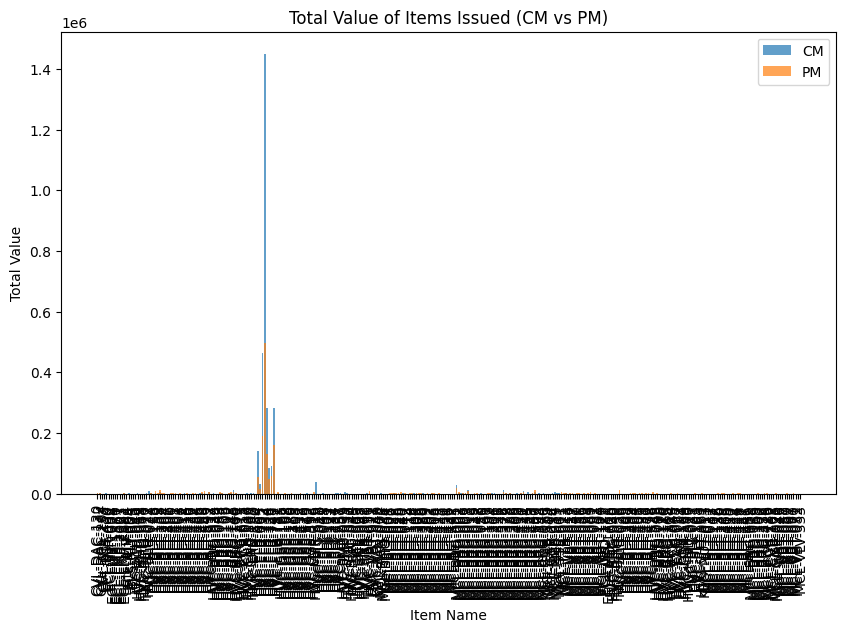

In [22]:
# Convert date columns to datetime
spare_issued_cm['ITEM ISSUE DATE'] = pd.to_datetime(spare_issued_cm['ITEM ISSUE DATE'])
spare_issued_pm['ITEM ISSUE DATE'] = pd.to_datetime(spare_issued_pm['ITEM ISSUE DATE'])
work_order_cm['Creation Date & Time'] = pd.to_datetime(work_order_cm['Creation Date & Time'])
work_order_pm['Creation Date & Time'] = pd.to_datetime(work_order_pm['Creation Date & Time'])

# Aggregating the data
spare_issued_cm_summary = spare_issued_cm.groupby(['ITEM NAME', 'MAJOR CATEGORY']).agg({
    'QUANTITY': 'sum',
    'TOTAL VALUE': 'sum'
}).reset_index()

spare_issued_pm_summary = spare_issued_pm.groupby(['ITEM NAME', 'MAJOR CATEGORY']).agg({
    'QUANTITY': 'sum',
    'TOTAL VALUE': 'sum'
}).reset_index()

# Plotting example: Total Value of Items Issued (CM vs PM)
plt.figure(figsize=(10, 6))
plt.bar(spare_issued_cm_summary['ITEM NAME'], spare_issued_cm_summary['TOTAL VALUE'], label='CM', alpha=0.7)
plt.bar(spare_issued_pm_summary['ITEM NAME'], spare_issued_pm_summary['TOTAL VALUE'], label='PM', alpha=0.7)
plt.xlabel('Item Name')
plt.ylabel('Total Value')
plt.title('Total Value of Items Issued (CM vs PM)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [11]:
# Aggregate data by ITEM NAME
spare_issued_cm_summary = spare_issued_cm.groupby(['ITEM NAME']).agg({
    'QUANTITY': 'sum',
    'TOTAL VALUE': 'sum'
}).reset_index()

spare_issued_pm_summary = spare_issued_pm.groupby(['ITEM NAME']).agg({
    'QUANTITY': 'sum',
    'TOTAL VALUE': 'sum'
}).reset_index()

# Merge CM and PM summaries on ITEM NAME
merged_summary = pd.merge(spare_issued_cm_summary, spare_issued_pm_summary, on='ITEM NAME', how='outer', suffixes=('_CM', '_PM')).fillna(0)



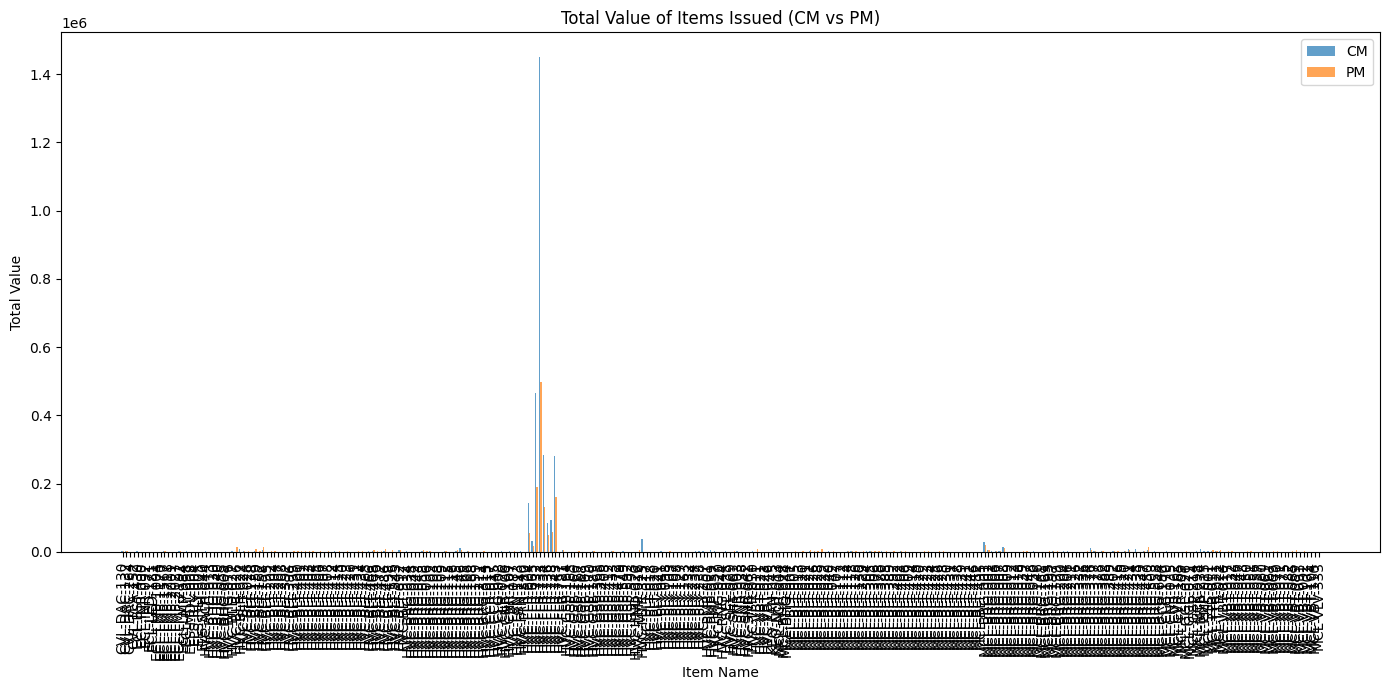

In [17]:
# Convert date columns to datetime
spare_issued_cm['ITEM ISSUE DATE'] = pd.to_datetime(spare_issued_cm['ITEM ISSUE DATE'])
spare_issued_pm['ITEM ISSUE DATE'] = pd.to_datetime(spare_issued_pm['ITEM ISSUE DATE'])

# Aggregate data by ITEM NAME
spare_issued_cm_summary = spare_issued_cm.groupby(['ITEM NAME']).agg({
    'QUANTITY': 'sum',
    'TOTAL VALUE': 'sum'
}).reset_index()

spare_issued_pm_summary = spare_issued_pm.groupby(['ITEM NAME']).agg({
    'QUANTITY': 'sum',
    'TOTAL VALUE': 'sum'
}).reset_index()

merged_summary = pd.merge(spare_issued_cm_summary, spare_issued_pm_summary, on='ITEM NAME', how='outer', suffixes=('_CM', '_PM')).fillna(0)

def plot_total_value_cm_vs_pm():
    plt.figure(figsize=(14, 7))
    width = 0.35
    indices = range(len(merged_summary))

    plt.bar(indices, merged_summary['TOTAL VALUE_CM'], width=width, label='CM', alpha=0.7)
    plt.bar([i + width for i in indices], merged_summary['TOTAL VALUE_PM'], width=width, label='PM', alpha=0.7)

    plt.xlabel('Item Name')
    plt.ylabel('Total Value')
    plt.title('Total Value of Items Issued (CM vs PM)')
    plt.xticks([i + width/2 for i in indices], merged_summary['ITEM NAME'], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_total_value_cm_vs_pm()

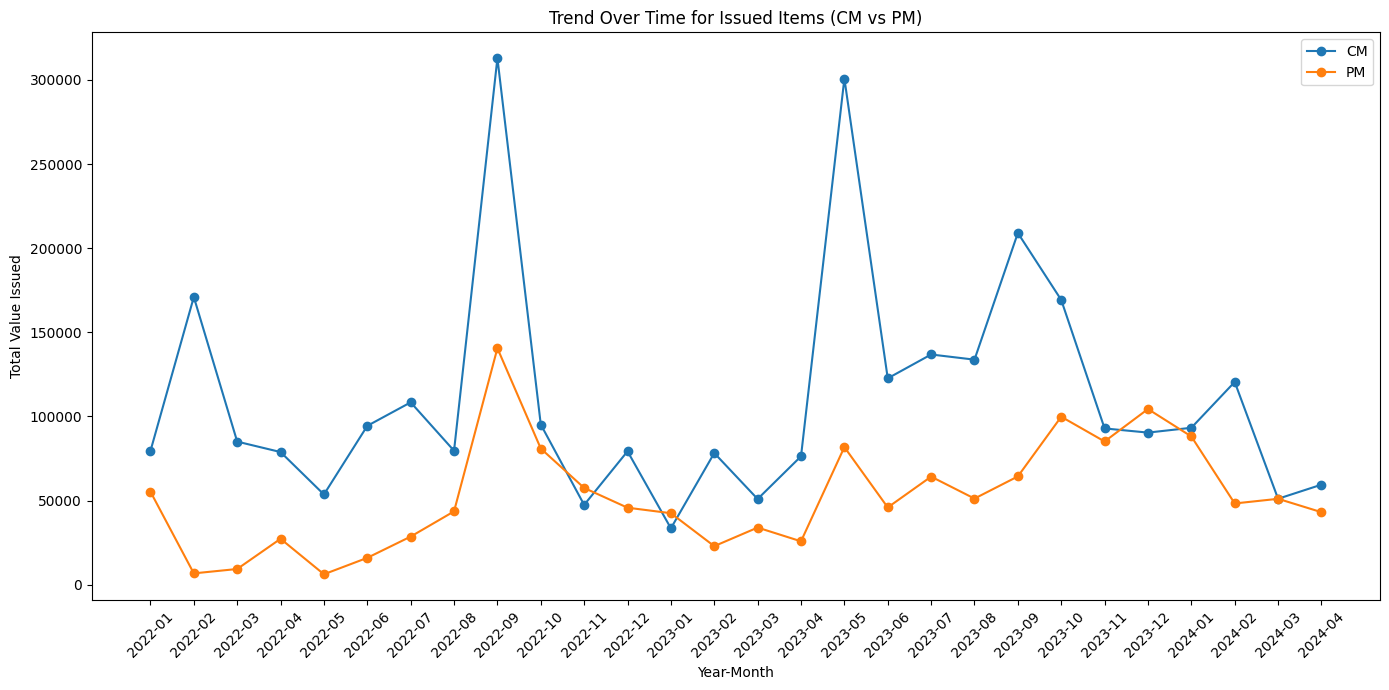

In [18]:
def plot_trend_over_time():
    spare_issued_cm['YearMonth'] = spare_issued_cm['ITEM ISSUE DATE'].dt.to_period('M')
    spare_issued_pm['YearMonth'] = spare_issued_pm['ITEM ISSUE DATE'].dt.to_period('M')

    cm_trend = spare_issued_cm.groupby('YearMonth').agg({'TOTAL VALUE': 'sum'}).reset_index()
    pm_trend = spare_issued_pm.groupby('YearMonth').agg({'TOTAL VALUE': 'sum'}).reset_index()

    plt.figure(figsize=(14, 7))
    plt.plot(cm_trend['YearMonth'].astype(str), cm_trend['TOTAL VALUE'], label='CM', marker='o')
    plt.plot(pm_trend['YearMonth'].astype(str), pm_trend['TOTAL VALUE'], label='PM', marker='o')
    
    plt.xlabel('Year-Month')
    plt.ylabel('Total Value Issued')
    plt.title('Trend Over Time for Issued Items (CM vs PM)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_trend_over_time()



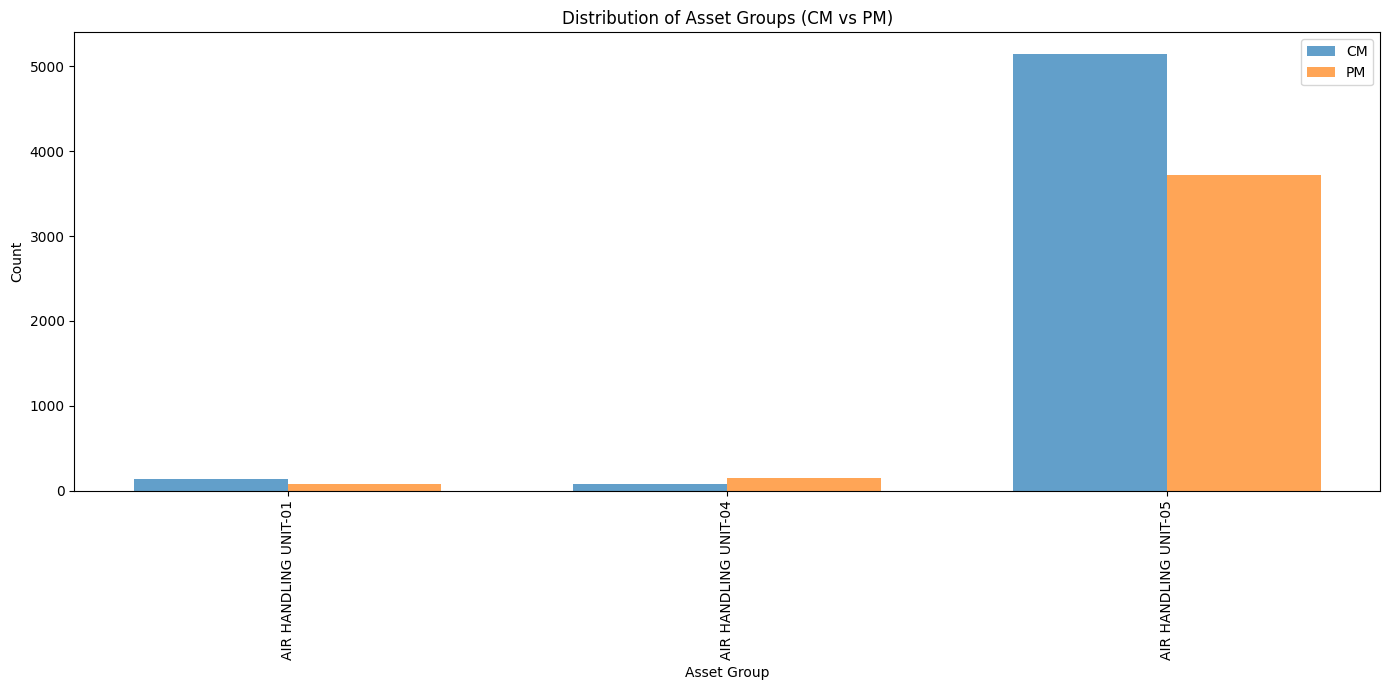

In [19]:
# Count occurrences of each ASSET GROUP
cm_asset_group = spare_issued_cm['ASSET GROUP'].value_counts().reset_index()
pm_asset_group = spare_issued_pm['ASSET GROUP'].value_counts().reset_index()

# Rename columns for clarity
cm_asset_group.columns = ['Asset Group', 'Count_CM']
pm_asset_group.columns = ['Asset Group', 'Count_PM']

# Merge CM and PM data on 'Asset Group'
merged_asset_group = pd.merge(cm_asset_group, pm_asset_group, on='Asset Group', how='outer').fillna(0)

# Plot the distribution of asset groups for CM and PM
def plot_asset_group_distribution():
    plt.figure(figsize=(14, 7))
    
    width = 0.35
    indices = range(len(merged_asset_group))
    
    plt.bar(indices, merged_asset_group['Count_CM'], width=width, label='CM', alpha=0.7)
    plt.bar([i + width for i in indices], merged_asset_group['Count_PM'], width=width, label='PM', alpha=0.7)
    
    plt.xlabel('Asset Group')
    plt.ylabel('Count')
    plt.title('Distribution of Asset Groups (CM vs PM)')
    plt.xticks([i + width/2 for i in indices], merged_asset_group['Asset Group'], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_asset_group_distribution()



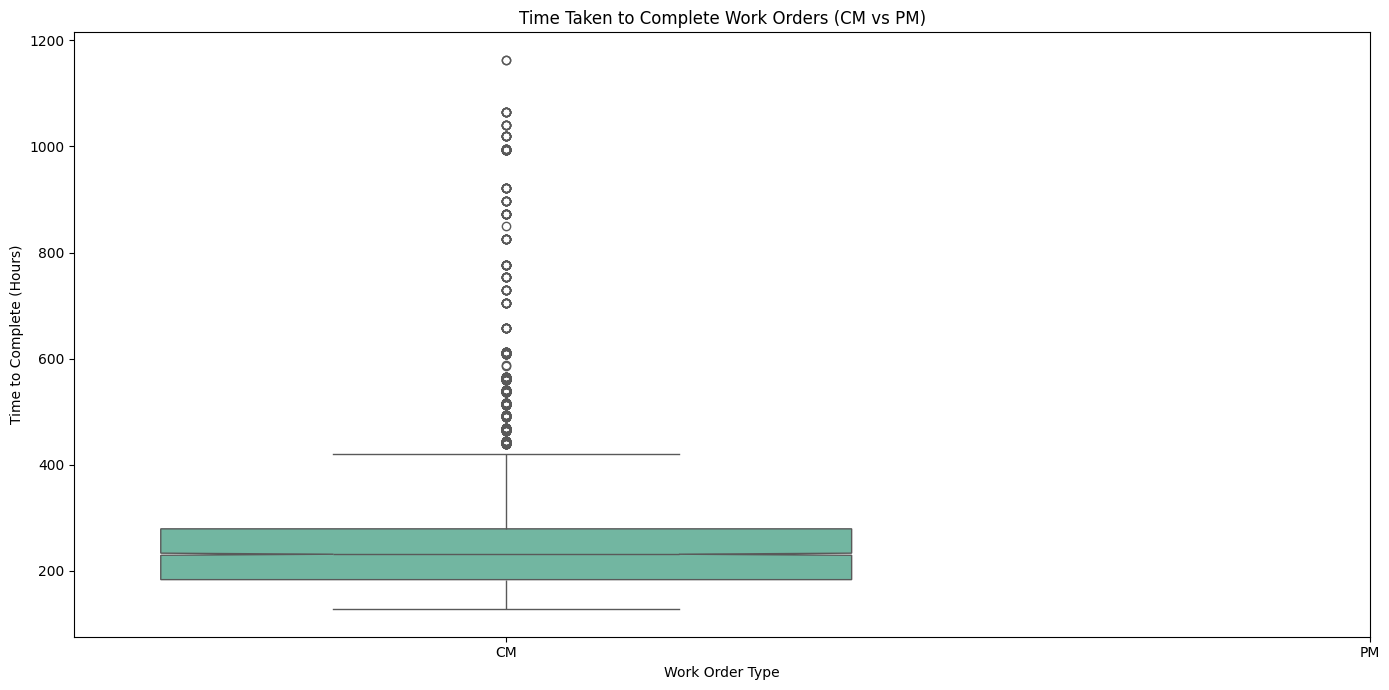

In [20]:
# Example 4: Time Taken to Complete Work Orders
def plot_time_taken_to_complete_work_orders():
    work_order_cm['Time to Complete'] = pd.to_datetime(work_order_cm['Target Response Date & Time']) - pd.to_datetime(work_order_cm['Creation Date & Time'])
    work_order_pm['Time to Complete'] = pd.to_datetime(work_order_pm['Target Response Date & Time']) - pd.to_datetime(work_order_pm['Creation Date & Time'])

    plt.figure(figsize=(14, 7))
    sns.boxplot(data=[work_order_cm['Time to Complete'].dt.total_seconds() / 3600, 
                      work_order_pm['Time to Complete'].dt.total_seconds() / 3600], 
                palette="Set2", 
                notch=True)
    
    plt.xlabel('Work Order Type')
    plt.ylabel('Time to Complete (Hours)')
    plt.title('Time Taken to Complete Work Orders (CM vs PM)')
    plt.xticks([0, 1], ['CM', 'PM'])
    plt.tight_layout()
    plt.show()

plot_time_taken_to_complete_work_orders()



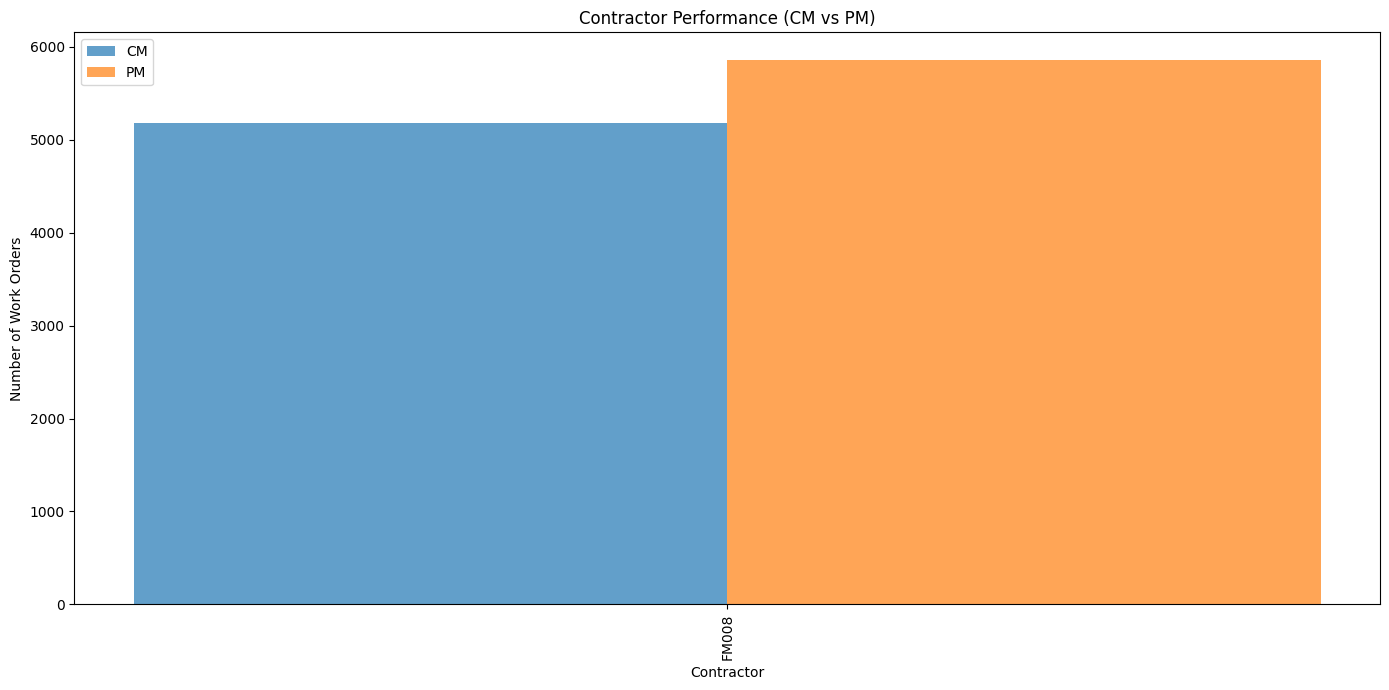

In [21]:
# Count occurrences of each Contractor
contractor_cm = work_order_cm['Contractor'].value_counts().reset_index()
contractor_pm = work_order_pm['Contractor'].value_counts().reset_index()

# Rename columns for clarity
contractor_cm.columns = ['Contractor', 'Count_CM']
contractor_pm.columns = ['Contractor', 'Count_PM']

# Merge CM and PM data on 'Contractor'
merged_contractors = pd.merge(contractor_cm, contractor_pm, on='Contractor', how='outer').fillna(0)

# Plot the performance of contractors for CM and PM
def plot_contractor_performance():
    plt.figure(figsize=(14, 7))
    
    width = 0.35
    indices = range(len(merged_contractors))
    
    plt.bar(indices, merged_contractors['Count_CM'], width=width, label='CM', alpha=0.7)
    plt.bar([i + width for i in indices], merged_contractors['Count_PM'], width=width, label='PM', alpha=0.7)
    
    plt.xlabel('Contractor')
    plt.ylabel('Number of Work Orders')
    plt.title('Contractor Performance (CM vs PM)')
    plt.xticks([i + width/2 for i in indices], merged_contractors['Contractor'], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_contractor_performance()

In [15]:
import pandas as pd

def clean_and_format_spare_issued(df):
    # List of columns to drop
    columns_to_drop = ['ITEM ISSUE DATE', 'WORK ORDER NUMBER', 'ASSET NUMBER', 
                       'MAKE MODEL', 'ACTIVITY CODE', 'CREATION DATE']
    
    # Drop the columns that exist in the DataFrame
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
    
    # Rename columns for clarity
    df = df.rename(columns={
        'ITEM NAME': 'Item Name',
        'ITEM DESCRIPTION': 'Item Description',
        'MAJOR CATEGORY': 'Major Category',
        'MINOR CATEGORY': 'Minor Category',
        'ASSET GROUP': 'Asset Group',
        'QUANTITY': 'Quantity Issued',
        'TOTAL VALUE': 'Total Value'
    })
    
    return df

def clean_and_format_work_orders(df):
    # List of columns to drop
    columns_to_drop = [
        'Assign', 'Work Order', 'Asset Number', 'Contractor', 
        'Parent Asset Group', 'Creation Date & Time', 'Target Response Date & Time',
        'Resolution Code', 'Created By', 'Last updated by', 'Update Work Order', 
        'Complete Work Order', 'Requestor Staff Id', 'Requestor Name', 
        'QA Review Comments', 'Remarks', 'Mode of Reporting'
    ]
    
    # Drop the columns that exist in the DataFrame
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
    
    # Rename columns for clarity
    df = df.rename(columns={
        'Asset Group': 'Asset Group',
        'Description': 'Issue Description',
        'Target Time': 'Target Resolution Time'
    })
    
    return df

# Load the data into DataFrames
spare_issued_cm = pd.read_excel(path_spare_issued_cm)
spare_issued_pm = pd.read_excel(path_spare_issued_pm)
work_order_cm = pd.read_excel(path_work_order_cm)
work_order_pm = pd.read_excel(path_work_order_pm)

# Clean, format, and rename columns for readability
spare_issued_cm_clean = clean_and_format_spare_issued(spare_issued_cm)
spare_issued_pm_clean = clean_and_format_spare_issued(spare_issued_pm)
work_order_cm_clean = clean_and_format_work_orders(work_order_cm)
work_order_pm_clean = clean_and_format_work_orders(work_order_pm)

# Optionally, concatenate CM and PM DataFrames for spare issued items and work orders
combined_spare_issued_clean = pd.concat([spare_issued_cm_clean.assign(MaintenanceType='CM'),
                                         spare_issued_pm_clean.assign(MaintenanceType='PM')])

combined_work_orders_clean = pd.concat([work_order_cm_clean.assign(MaintenanceType='CM'),
                                        work_order_pm_clean.assign(MaintenanceType='PM')])

# Display cleaned DataFrames
print(combined_spare_issued_clean.head())
print(combined_work_orders_clean.head())

# Save cleaned and formatted DataFrames to CSV for readability
combined_spare_issued_clean.to_csv('readable_spare_issued.csv', index=False)
combined_work_orders_clean.to_csv('readable_work_orders.csv', index=False)

     Item Name                                   Item Description  \
0  HVC-FLR-733  BAG FILTER - 10 POCKET, CLASS: F7, MERV RATING...   
1  HVC-FLR-734  BAG FILTER - 5 POCKET, CLASS: F7, MERV RATING ...   
2  HVC-FLR-736  DUST FILTER - CLASS: G4, MERV RATING - 8, ISO ...   
3  HVC-FLR-743  DUST FILTER - CLASS: G4, MERV RATING - 8, ISO ...   
4  HVC-FLR-733  BAG FILTER - 10 POCKET, CLASS: F7, MERV RATING...   

  Major Category Minor Category           Asset Group  Quantity Issued  \
0           HVAC         FILTER  AIR HANDLING UNIT-05                6   
1           HVAC         FILTER  AIR HANDLING UNIT-05                2   
2           HVAC         FILTER  AIR HANDLING UNIT-05                2   
3           HVAC         FILTER  AIR HANDLING UNIT-05                6   
4           HVAC         FILTER  AIR HANDLING UNIT-05                2   

   Total Value MaintenanceType CONTRACTOR DEPARTMENT TARGET RESPONSE DATE  
0      1698.78              CM        NaN        NaN            

In [16]:
combined_spare_issued_clean.head()

,Item Name,Item Description,Major Category,Minor Category,Asset Group,Quantity Issued,Total Value,MaintenanceType,CONTRACTOR,DEPARTMENT,TARGET RESPONSE DATE
0,HVC-FLR-733,"BAG FILTER - 10 POCKET, CLASS: F7, MERV RATING...",HVAC,FILTER,AIR HANDLING UNIT-05,6,1698.78,CM,NaN,NaN,NaN
1,HVC-FLR-734,"BAG FILTER - 5 POCKET, CLASS: F7, MERV RATING ...",HVAC,FILTER,AIR HANDLING UNIT-05,2,345.46,CM,NaN,NaN,NaN
2,HVC-FLR-736,"DUST FILTER - CLASS: G4, MERV RATING - 8, ISO ...",HVAC,FILTER,AIR HANDLING UNIT-05,2,54.24,CM,NaN,NaN,NaN
3,HVC-FLR-743,"DUST FILTER - CLASS: G4, MERV RATING - 8, ISO ...",HVAC,FILTER,AIR HANDLING UNIT-05,6,209.58,CM,NaN,NaN,NaN
4,HVC-FLR-733,"BAG FILTER - 10 POCKET, CLASS: F7, MERV RATING...",HVAC,FILTER,AIR HANDLING UNIT-05,2,566.26,CM,NaN,NaN,NaN


- Asset Management: The data can be used to track which assets require the most maintenance, the frequency of work orders, and the types of issues that occur.
- Spare Parts Tracking: The spare issued datasets allow you to track which parts are most commonly used, their cost, and how they correlate with asset performance.
- Work Order Efficiency: By comparing the target completion times with the actual completion times, you can assess the efficiency of the maintenance process.
- Cost Analysis: The "Total Value" field in the spare issued datasets provides insight into the cost associated with maintaining specific assets.d

In [28]:
# Asset Management 

import pandas as pd

# Re-load the Excel files due to the previous error
work_order_pm_df = pd.read_excel('Work_Order_PM.xlsx')
work_order_cm_df = pd.read_excel('Work_Order_CM.xlsx')

# Combine the Work Order PM and CM data for comprehensive analysis
combined_work_order_df = pd.concat([work_order_pm_df, work_order_cm_df])

# Count the number of work orders per asset
work_order_counts = combined_work_order_df['Asset Number'].value_counts()

# Preparing a dataframe to display the assets requiring the most maintenance
most_maintenance_assets_df = work_order_counts.reset_index()
most_maintenance_assets_df.columns = ['Asset Number', 'Work Order Count']

# Display the top assets requiring the most maintenance
most_maintenance_assets_df.head(10)

,Asset Number,Work Order Count
0,ASD-MTB-FOF011-AHU043,207
1,ASD-MTB-FOF024-AHU055,144
2,ASD-MTB-FOF010-AHU040,133
3,ASD-COA-SFL005-AHU076,127
4,ASD-MTB-FOF010-AHU042,122
5,ASD-MTB-FOF011-AHU041,100
6,ASD-MTB-FOF021-AHU054,99
7,ASD-MTB-GFL007-AHU003,91
8,ASD-LOU-QA2-AHU001,89
9,ASD-MTB-FOF008-AHU206,81


In [34]:
# Separate the CM (Corrective Maintenance) and PM (Preventive Maintenance) data
spare_issued_cm_df = pd.read_excel('Spare_Issued_CM.xlsx')
spare_issued_pm_df = pd.read_excel('Spare_Issued_PM.xlsx')

# Create frequency analysis for both CM and PM work orders
cm_work_order_frequency = work_order_cm_df.groupby(work_order_cm_df['Creation Date & Time'].dt.to_period('M')).size().sort_values(ascending=False)
pm_work_order_frequency = work_order_pm_df.groupby(work_order_pm_df['Creation Date & Time'].dt.to_period('M')).size().sort_values(ascending=False)

# Categorize issues in CM and PM by analyzing work order descriptions
cm_issue_categories = work_order_cm_df['Description'].value_counts().head(10)
pm_issue_categories = work_order_pm_df['Description'].value_counts().head(10)

# Compare the number of CM vs. PM work orders
cm_vs_pm_comparison = pd.DataFrame({
    'Work Order Type': ['Corrective Maintenance', 'Preventive Maintenance'],
    'Total Work Orders': [work_order_cm_df.shape[0], work_order_pm_df.shape[0]]
})

# Displaying the results to the user
cm_work_order_frequency.head(), pm_work_order_frequency.head(), cm_issue_categories, pm_issue_categories, cm_vs_pm_comparison

(Creation Date & Time
 2023-08    289
 2022-11    277
 2023-09    261
 2023-11    251
 2022-02    235
 Freq: M, dtype: int64,
 Creation Date & Time
 2023-03    309
 2024-03    254
 2023-12    253
 2023-06    246
 2023-10    239
 Freq: M, dtype: int64,
 Description
 DUCT INSULATION DAMAGED           61
 AHU FILTER DIRTY                  47
 DP1 FILTER ALARM                  40
 FILTER DIRTY                      37
 DP3 FILTER ALARM                  26
 COOLING COIL DIRTY                24
 CHILLED WATER LINE PAINT FADED    22
 DUCT INSULATION IS DAMAGED        20
 AHU FILTER IS DIRTY               19
 COOLING COIL IS DIRTY             15
 Name: count, dtype: int64,
 Description
 MONTHLY PREVENTIVE MAINTENANCE OF AIR HANDLING UNIT-05      3740
 3 MONTHLY PREVENTIVE MAINTENANCE OF AIR HANDLING UNIT-05     963
 6 MONTHLY PREVENTIVE MAINTENANCE OF AIR HANDLING UNIT-05     500
 YEARLY PREVENTIVE MAINTENANCE OF AIR HANDLING UNIT-05        449
 MONTHLY PREVENTIVE MAINTENANCE OF AIR HANDLING UN

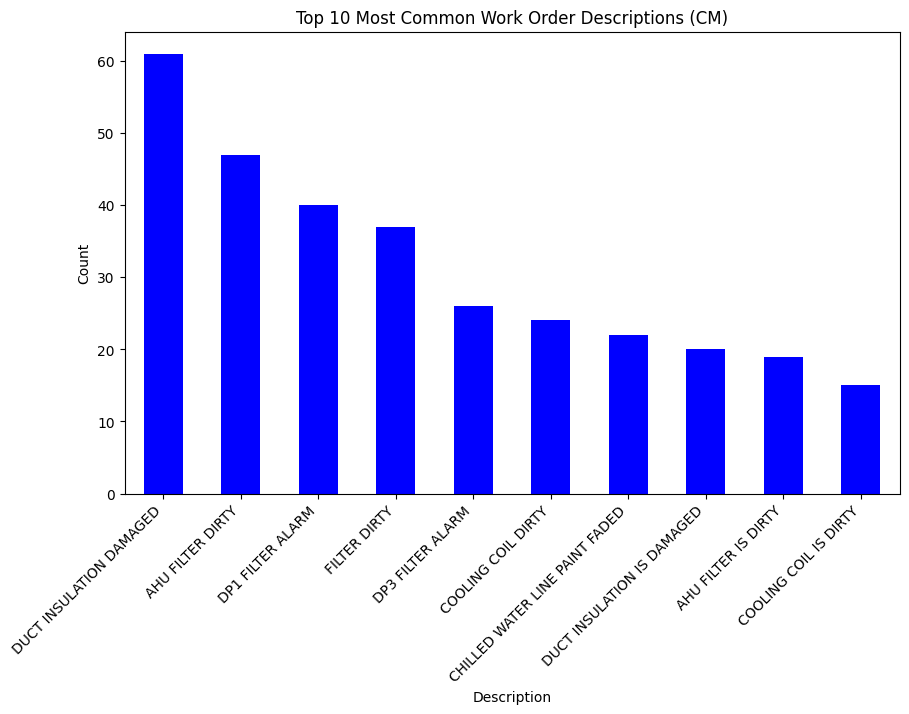

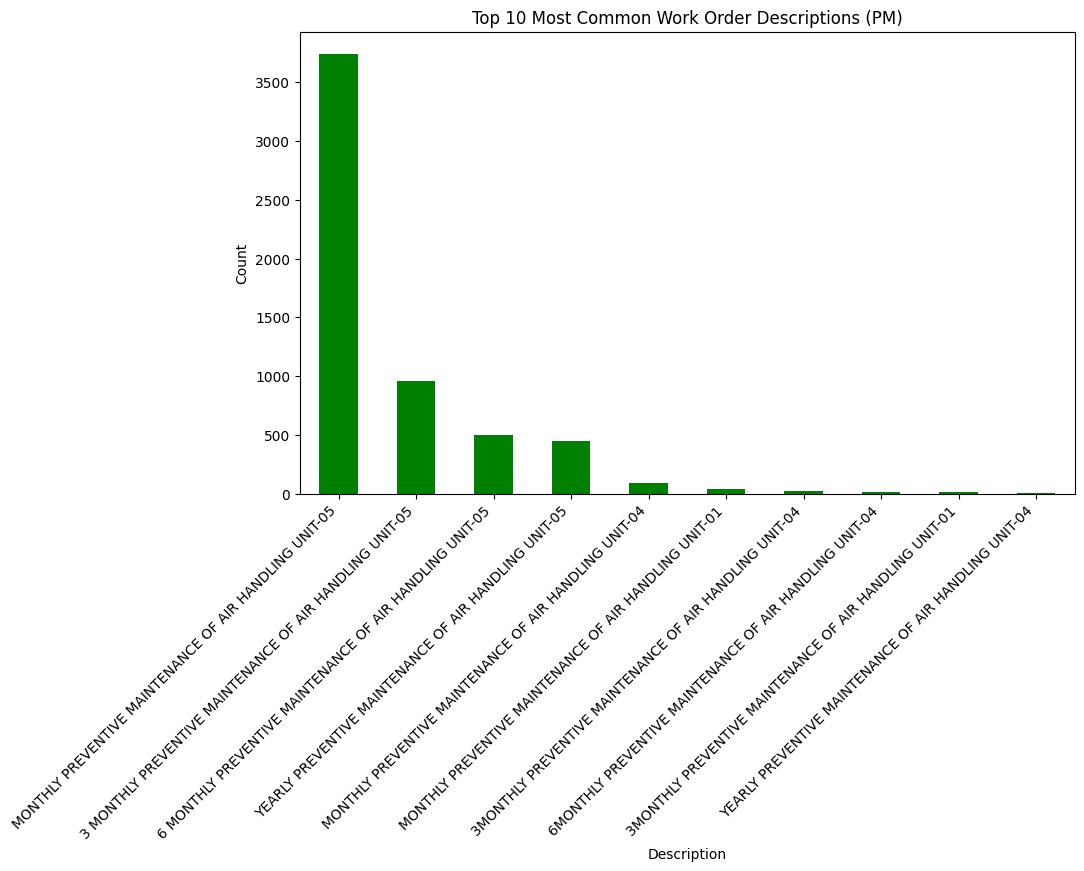

In [82]:
import matplotlib.pyplot as plt

# Plot for CM issue categories
plt.figure(figsize=(10, 6))
cm_issue_categories.plot(kind='bar', color='blue')
plt.title('Top 10 Most Common Work Order Descriptions (CM)')
plt.xlabel('Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot for PM issue categories
plt.figure(figsize=(10, 6))
pm_issue_categories.plot(kind='bar', color='green')
plt.title('Top 10 Most Common Work Order Descriptions (PM)')
plt.xlabel('Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Asset Number
ASD-MTB-FOF06A-AHU172    72829.77
ASD-MTB-FOF008-AHU018    57630.87
ASD-MTB-FOF021-AHU186    53890.56
ASD-MTB-FOF009-AHU031    51467.40
ASD-MTB-GFL06A-AHU169    50448.92
                           ...   
ASD-COC-TFL008-AHU152      586.20
ASD-LOU-QA1-AHU003         467.70
ASD-COC-TFL005-AHU144      444.70
ASD-COC-TFL003-AHU138      227.74
ASD-COB-APR-AHU095         181.70
Name: TOTAL VALUE, Length: 209, dtype: float64
Asset Number
ASD-MTB-GFL07A-AHU176    44414.96
ASD-COB-GFL18A-AHU191    41391.96
ASD-COA-GFL003-AHU183    33651.48
ASD-MTB-FOF06A-AHU173    32163.90
ASD-COA-GFL001-AHU066    30781.10
                           ...   
ASD-MTB-FOF009-AHU017      340.31
ASD-COC-GFL005-AHU124      317.89
ASD-COC-GFL005-AHU123      296.89
ASD-MTB-FOF008-AHU020      154.00
ASD-MTB-FOF008-AHU018       56.00
Name: TOTAL VALUE, Length: 210, dtype: float64
                       TOTAL VALUE  Spare Parts Count  Work Order Count
Asset Number                                                

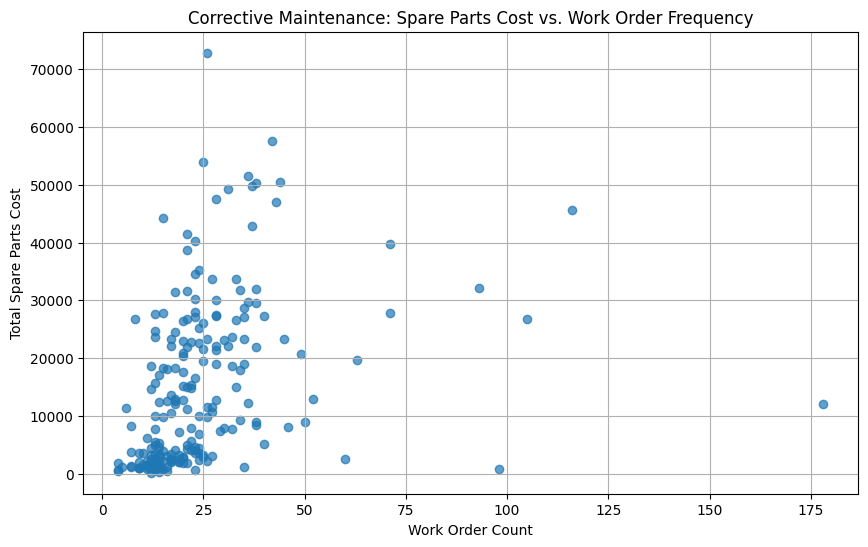

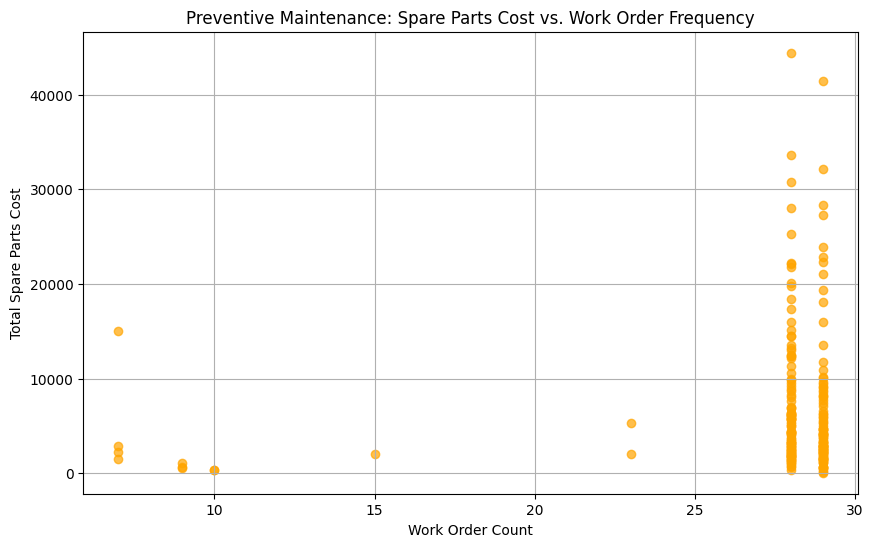

In [102]:
# Sparse parts

# Re-load the Excel files due to the previous error
spare_issued_pm_df = pd.read_excel('Spare_Issued_PM.xlsx')
spare_issued_cm_df = pd.read_excel('Spare_Issued_CM.xlsx')
work_order_cm_df = pd.read_excel('Work_Order_CM.xlsx')
work_order_pm_df = pd.read_excel('Work_Order_PM.xlsx')


# Count the frequency of each spare part in the CM dataset
cm_spare_parts_frequency = spare_issued_cm_df['ITEM NAME'].value_counts()

# Count the frequency of each spare part in the PM dataset
pm_spare_parts_frequency = spare_issued_pm_df['ITEM NAME'].value_counts()

# Calculate the total cost of each spare part in the CM dataset
cm_spare_parts_cost = spare_issued_cm_df.groupby('ITEM NAME')['TOTAL VALUE'].sum()

# Calculate the total cost of each spare part in the PM dataset
pm_spare_parts_cost = spare_issued_pm_df.groupby('ITEM NAME')['TOTAL VALUE'].sum()

# Merge CM spare parts with CM work orders
cm_spare_asset_correlation = pd.merge(spare_issued_cm_df, work_order_cm_df, left_on='WORK ORDER NUMBER', right_on='Work Order')

# Merge PM spare parts with PM work orders
pm_spare_asset_correlation = pd.merge(spare_issued_pm_df, work_order_pm_df, left_on='WORK ORDER NUMBER', right_on='Work Order')

# Analyze the correlation by grouping by asset and summing the total cost of spare parts used
cm_asset_performance = cm_spare_asset_correlation.groupby('Asset Number')['TOTAL VALUE'].sum().sort_values(ascending=False)
pm_asset_performance = pm_spare_asset_correlation.groupby('Asset Number')['TOTAL VALUE'].sum().sort_values(ascending=False)

print(cm_asset_performance)

print(pm_asset_performance)

# Aggregate by Asset Number for CM data
cm_asset_performance = cm_spare_asset_correlation.groupby('Asset Number').agg({
    'TOTAL VALUE': 'sum',
    'ITEM NAME': 'count'
}).rename(columns={'ITEM NAME': 'Spare Parts Count'})

# Aggregate by Asset Number for PM data
pm_asset_performance = pm_spare_asset_correlation.groupby('Asset Number').agg({
    'TOTAL VALUE': 'sum',
    'ITEM NAME': 'count'
}).rename(columns={'ITEM NAME': 'Spare Parts Count'})

# Compare with the frequency of work orders for CM
cm_work_order_frequency = work_order_cm_df['Asset Number'].value_counts()

# Compare with the frequency of work orders for PM
pm_work_order_frequency = work_order_pm_df['Asset Number'].value_counts()

# Merge the asset performance with work order frequency for CM
cm_correlation = pd.merge(cm_asset_performance, cm_work_order_frequency, left_index=True, right_index=True).rename(columns={'Asset Number': 'Work Order Count'})

# Merge the asset performance with work order frequency for PM
pm_correlation = pd.merge(pm_asset_performance, pm_work_order_frequency, left_index=True, right_index=True).rename(columns={'Asset Number': 'Work Order Count'})

# Merge the asset performance with work order frequency for CM
cm_correlation = pd.merge(cm_asset_performance, cm_work_order_frequency, left_index=True, right_index=True)
cm_correlation = cm_correlation.rename(columns={cm_correlation.columns[-1]: 'Work Order Count'})  # Rename the last column to Work Order Count

# Merge the asset performance with work order frequency for PM
pm_correlation = pd.merge(pm_asset_performance, pm_work_order_frequency, left_index=True, right_index=True)
pm_correlation = pm_correlation.rename(columns={pm_correlation.columns[-1]: 'Work Order Count'})  # Rename the last column to Work Order Count

print(cm_correlation.head())
print(pm_correlation.head())

import matplotlib.pyplot as plt

# Scatter plot for CM data
plt.figure(figsize=(10, 6))
plt.scatter(cm_correlation['Work Order Count'], cm_correlation['TOTAL VALUE'], alpha=0.7)
plt.title('Corrective Maintenance: Spare Parts Cost vs. Work Order Frequency')
plt.xlabel('Work Order Count')
plt.ylabel('Total Spare Parts Cost')
plt.grid(True)
plt.show()

# Scatter plot for PM data
plt.figure(figsize=(10, 6))
plt.scatter(pm_correlation['Work Order Count'], pm_correlation['TOTAL VALUE'], alpha=0.7, color='orange')
plt.title('Preventive Maintenance: Spare Parts Cost vs. Work Order Frequency')
plt.xlabel('Work Order Count')
plt.ylabel('Total Spare Parts Cost')
plt.grid(True)
plt.show()


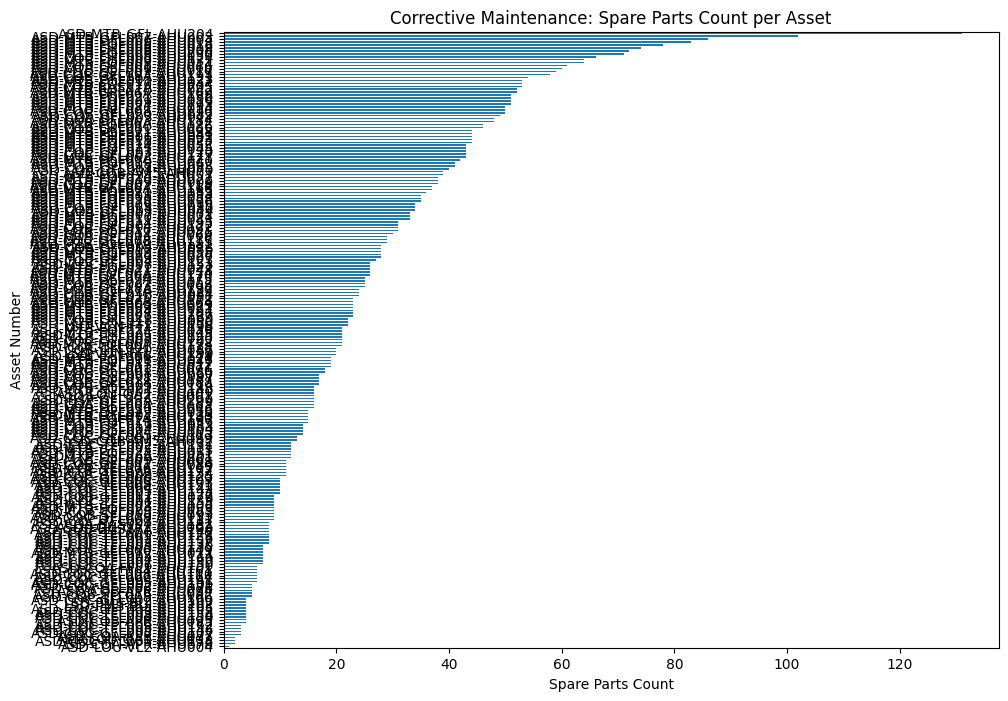

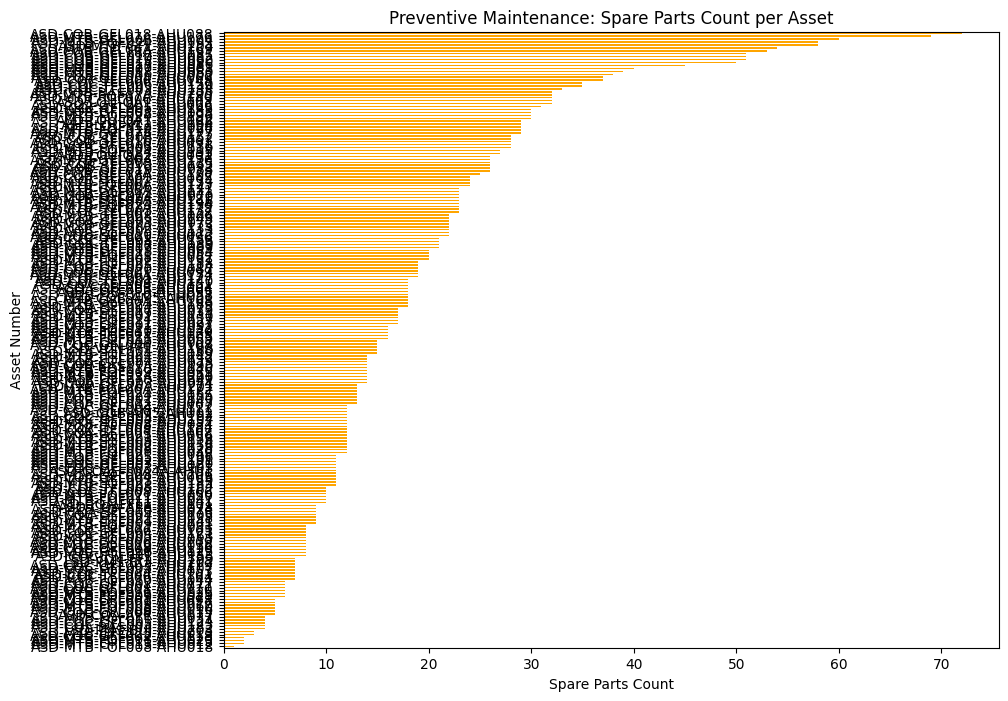

In [103]:
# Bar chart for CM data
cm_correlation['Spare Parts Count'].sort_values().plot(kind='barh', figsize=(10, 8), title='Corrective Maintenance: Spare Parts Count per Asset')
plt.xlabel('Spare Parts Count')
plt.show()

# Bar chart for PM data
pm_correlation['Spare Parts Count'].sort_values().plot(kind='barh', figsize=(10, 8), color='orange', title='Preventive Maintenance: Spare Parts Count per Asset')
plt.xlabel('Spare Parts Count')
plt.show()

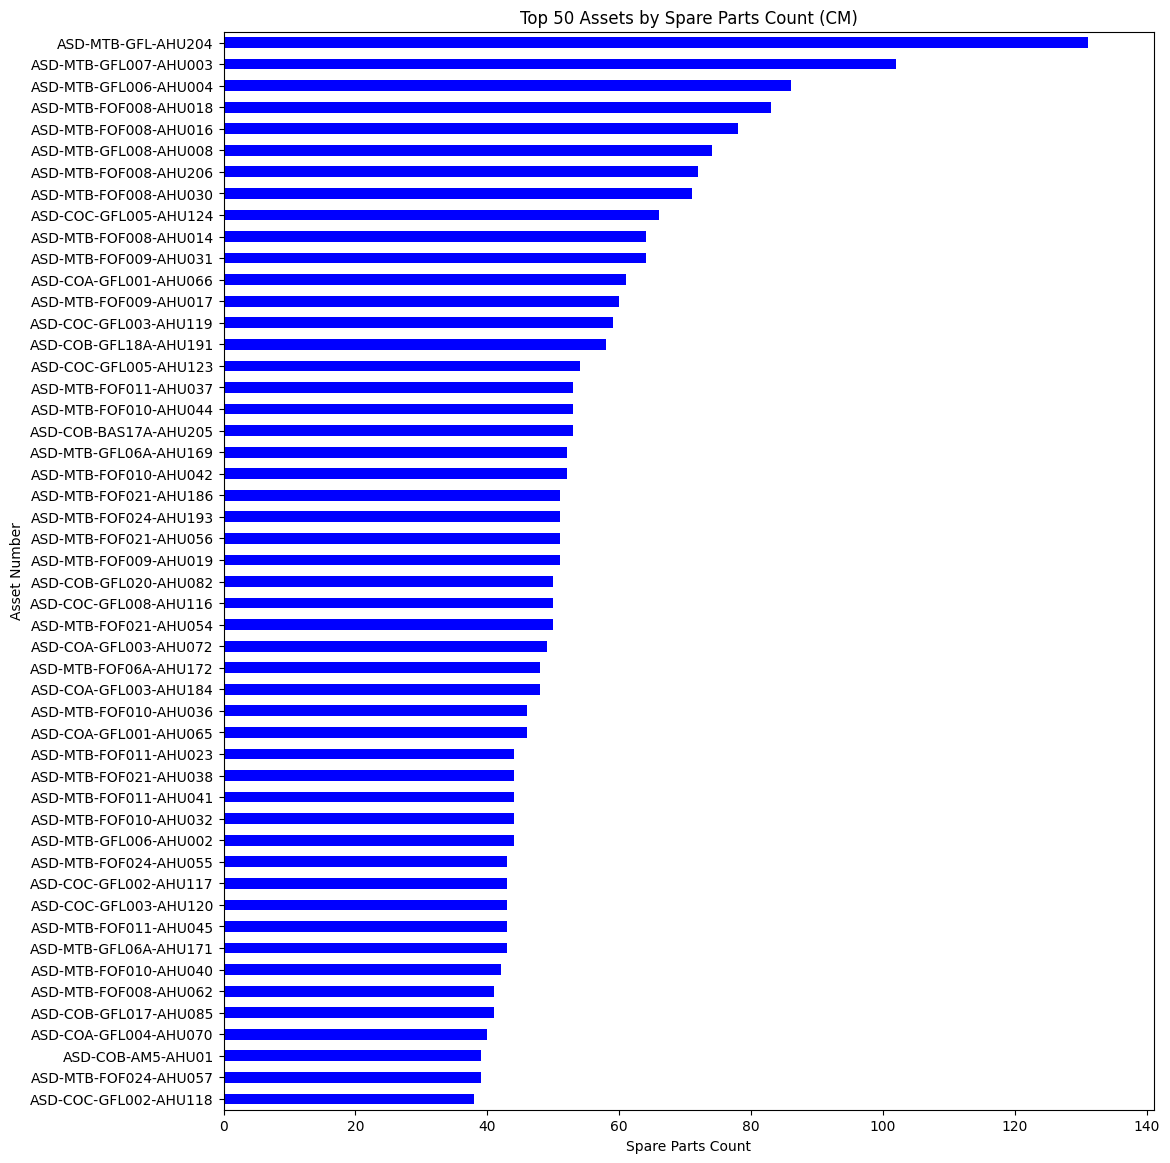

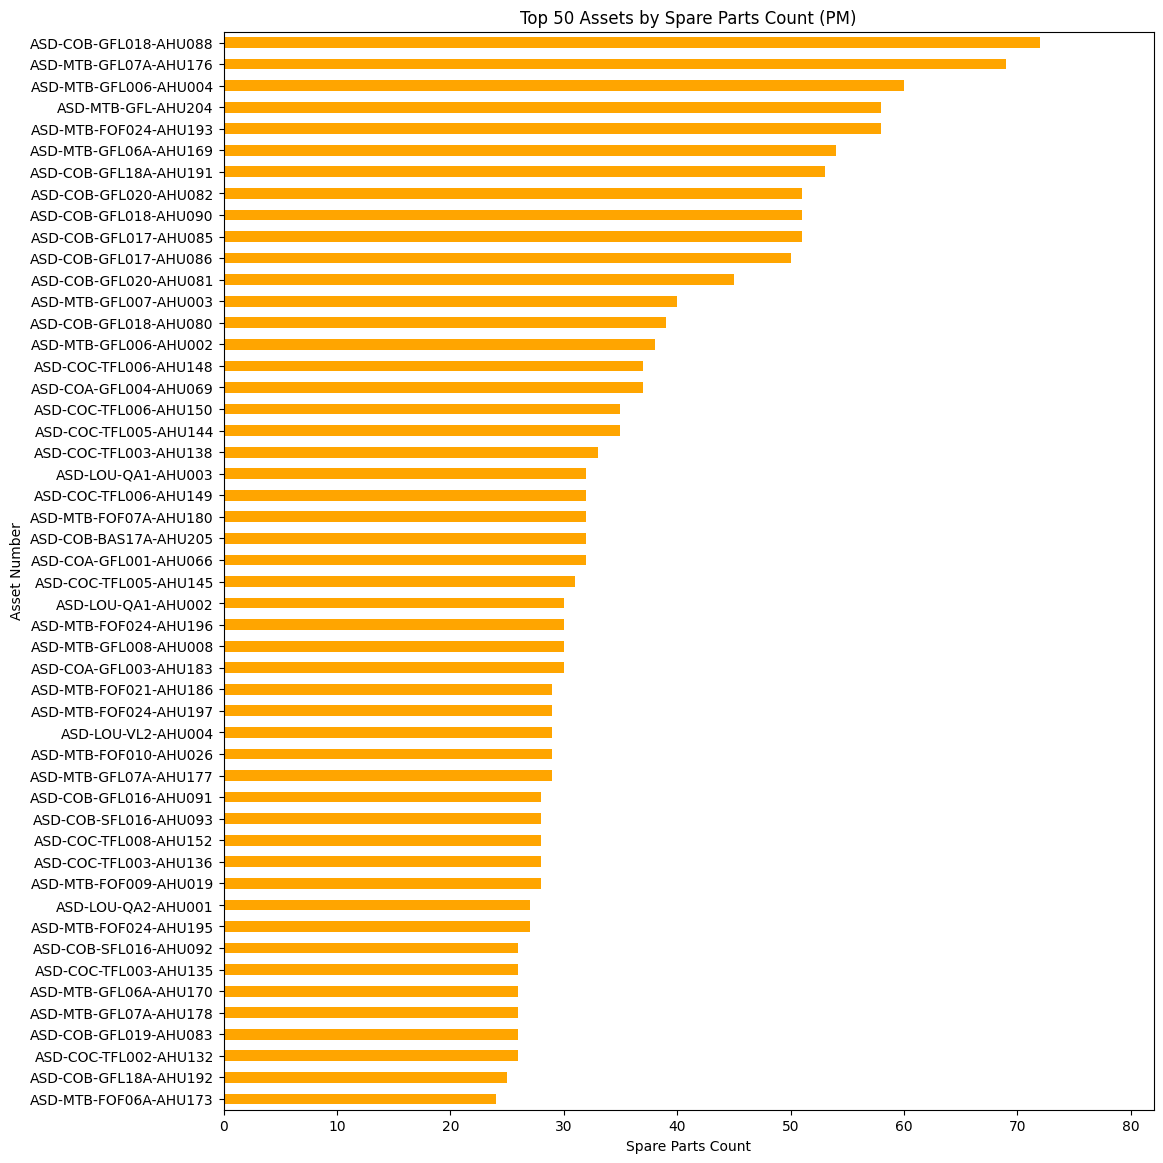

In [107]:
import matplotlib.pyplot as plt

# Display the top 50 assets for CM data
plt.figure(figsize=(12, 14))  # Increase figure size to fit more labels
cm_correlation['Spare Parts Count'].sort_values(ascending=False).head(50).sort_values().plot(kind='barh', color='blue')
plt.title('Top 50 Assets by Spare Parts Count (CM)')
plt.xlabel('Spare Parts Count')
plt.ylabel('Asset Number')
plt.xlim(0, cm_correlation['Spare Parts Count'].max() + 10)  # Set the x-axis limit to the max value across the dataset
plt.xticks(fontsize=10)  # Adjust font size for better readability
plt.show()

# Display the top 50 assets for PM data
plt.figure(figsize=(12, 14))  # Increase figure size to fit more labels
pm_correlation['Spare Parts Count'].sort_values(ascending=False).head(50).sort_values().plot(kind='barh', color='orange')
plt.title('Top 50 Assets by Spare Parts Count (PM)')
plt.xlabel('Spare Parts Count')
plt.ylabel('Asset Number')
plt.xlim(0, pm_correlation['Spare Parts Count'].max() + 10)  # Set the x-axis limit to the max value across the dataset
plt.xticks(fontsize=10)  # Adjust font size for better readability
plt.show()

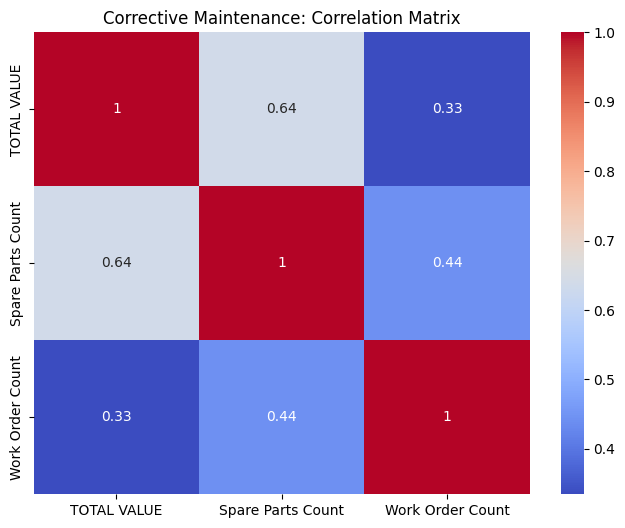

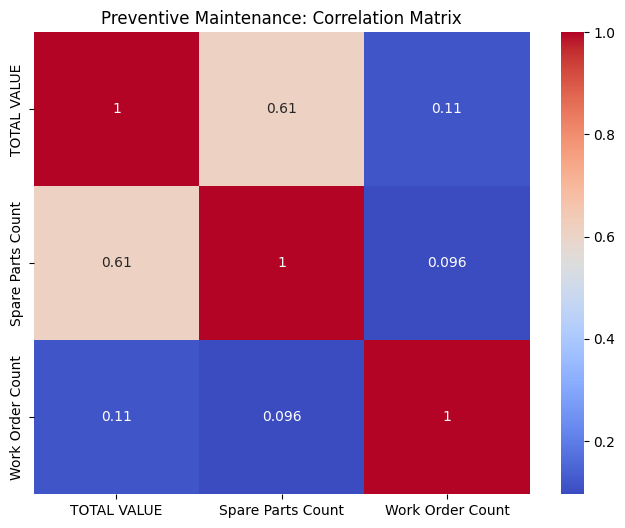

In [52]:
import seaborn as sns

# Compute the correlation matrix for CM
cm_corr_matrix = cm_correlation.corr()

# Plot heatmap for CM data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrective Maintenance: Correlation Matrix')
plt.show()

# Compute the correlation matrix for PM
pm_corr_matrix = pm_correlation.corr()

# Plot heatmap for PM data
plt.figure(figsize=(8, 6))
sns.heatmap(pm_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Preventive Maintenance: Correlation Matrix')
plt.show()

In [74]:
# Work Order Efficiency

import pandas as pd

# Re-load the Excel files due to the previous error
spare_issued_pm_df = pd.read_excel('Spare_Issued_PM.xlsx')
spare_issued_cm_df = pd.read_excel('Spare_Issued_CM.xlsx')
work_order_cm_df = pd.read_excel('Work_Order_CM.xlsx')
work_order_pm_df = pd.read_excel('Work_Order_PM.xlsx')

# Assuming the datasets are already loaded into work_order_cm_df and work_order_pm_df

# Calculate time difference between target and actual completion for CM
work_order_cm_df['Completion Difference'] = pd.to_datetime(work_order_cm_df['Actual Resolution Date & Time']) - pd.to_datetime(work_order_cm_df['Target Resolution Date & Time'])

# Calculate time difference between target and actual completion for PM
work_order_pm_df['Completion Difference'] = pd.to_datetime(work_order_pm_df['Actual Resolution Date & Time']) - pd.to_datetime(work_order_pm_df['Target Resolution Date & Time'])

# Categorize work orders based on efficiency for CM
work_order_cm_df['Efficiency Category'] = work_order_cm_df['Completion Difference'].apply(
    lambda x: 'On-Time' if x <= pd.Timedelta(0) else 'Late'
)

# Categorize work orders based on efficiency for PM
work_order_pm_df['Efficiency Category'] = work_order_pm_df['Completion Difference'].apply(
    lambda x: 'On-Time' if x <= pd.Timedelta(0) else 'Late'
)

# Analyze the efficiency categories for CM
cm_efficiency_summary = work_order_cm_df['Efficiency Category'].value_counts(normalize=True) * 100

# Analyze the efficiency categories for PM
pm_efficiency_summary = work_order_pm_df['Efficiency Category'].value_counts(normalize=True) * 100

# Display the efficiency summaries
print("Corrective Maintenance Efficiency Summary:")
print(cm_efficiency_summary)

print("\nPreventive Maintenance Efficiency Summary:")
print(pm_efficiency_summary)

Corrective Maintenance Efficiency Summary:
Efficiency Category
On-Time    99.690881
Late        0.309119
Name: proportion, dtype: float64

Preventive Maintenance Efficiency Summary:
Efficiency Category
On-Time    94.099591
Late        5.900409
Name: proportion, dtype: float64


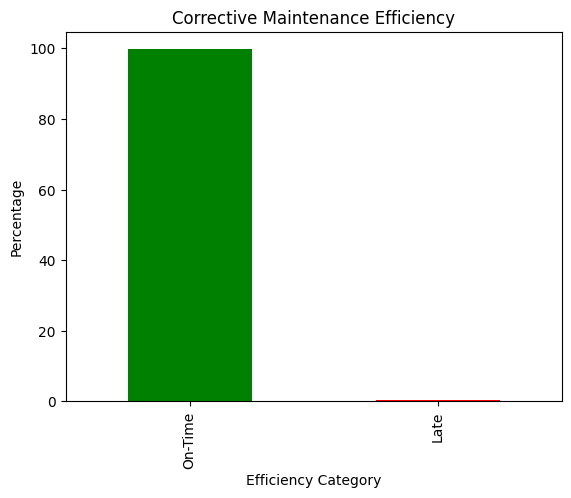

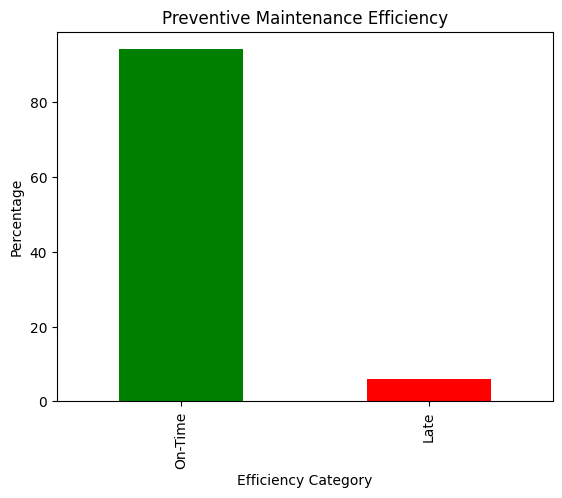

In [75]:
import matplotlib.pyplot as plt

# Bar chart for CM efficiency
cm_efficiency_summary.plot(kind='bar', color=['green', 'red'], title='Corrective Maintenance Efficiency')
plt.xlabel('Efficiency Category')
plt.ylabel('Percentage')
plt.show()

# Bar chart for PM efficiency
pm_efficiency_summary.plot(kind='bar', color=['green', 'red'], title='Preventive Maintenance Efficiency')
plt.xlabel('Efficiency Category')
plt.ylabel('Percentage')
plt.show()

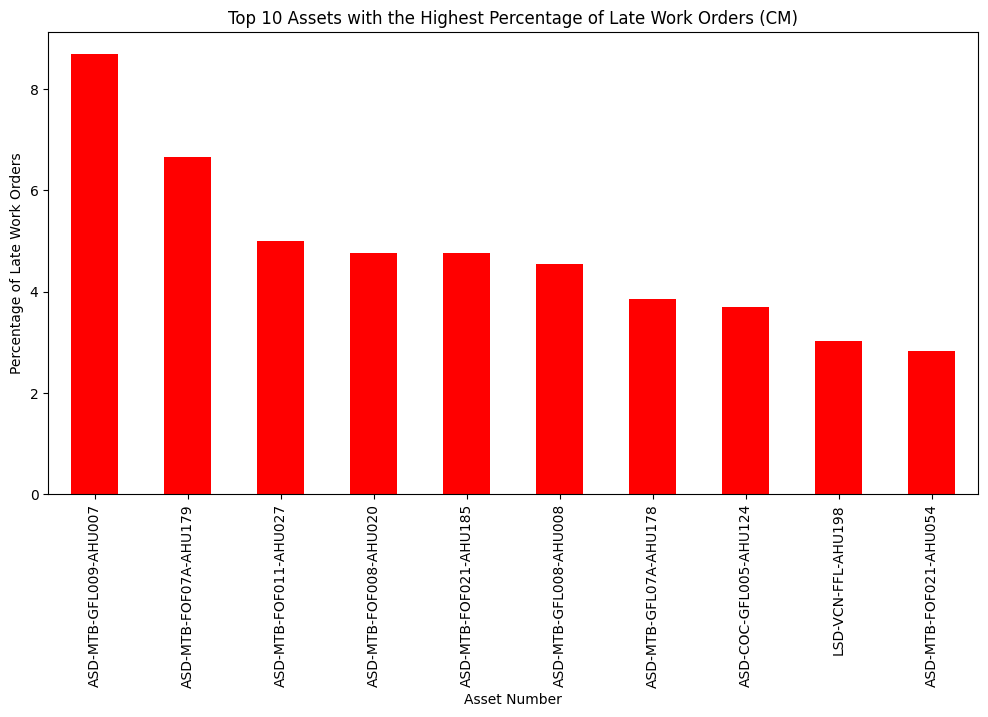

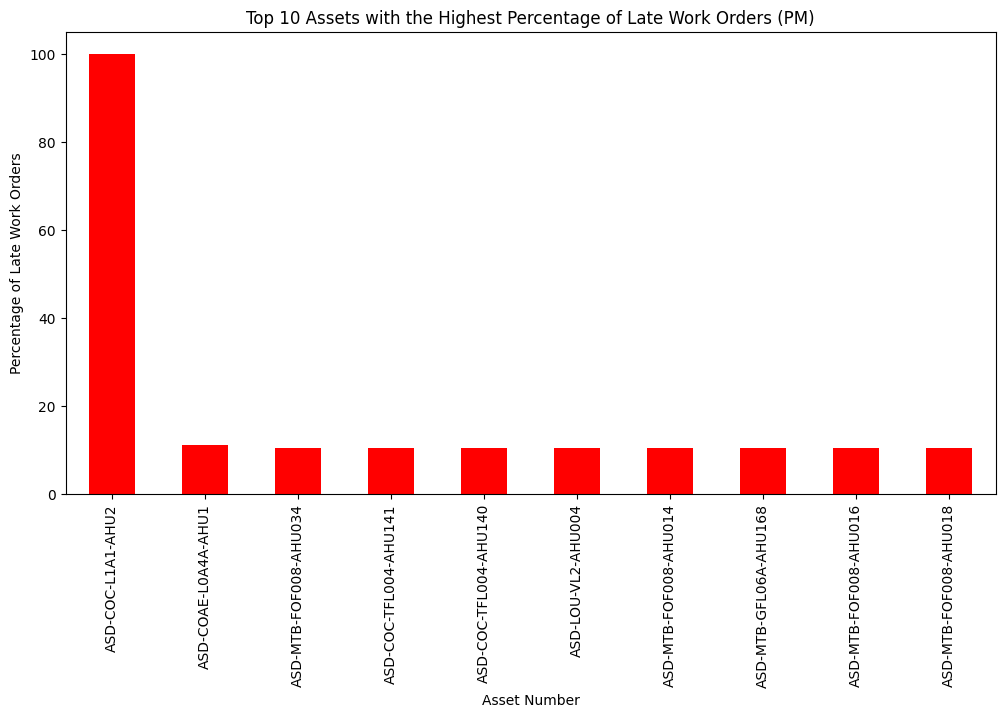

In [80]:
# Calculate the number of late work orders by asset for CM
cm_late_work_orders = work_order_cm_df[work_order_cm_df['Efficiency Category'] == 'Late'].groupby('Asset Number').size()

# Calculate the total number of work orders by asset for CM
cm_total_work_orders = work_order_cm_df.groupby('Asset Number').size()

# Calculate the percentage of late work orders for CM
cm_late_percentage = (cm_late_work_orders / cm_total_work_orders) * 100

# Sort and select the top 10 assets with the highest percentage of late work orders
top_cm_late_assets = cm_late_percentage.sort_values(ascending=False).head(10)

# Plot the top 10 late assets for CM
plt.figure(figsize=(12, 6))
top_cm_late_assets.plot(kind='bar', color='red')
plt.title('Top 10 Assets with the Highest Percentage of Late Work Orders (CM)')
plt.xlabel('Asset Number')
plt.ylabel('Percentage of Late Work Orders')
plt.show()

# Repeat the same steps for PM

# Calculate the number of late work orders by asset for PM
pm_late_work_orders = work_order_pm_df[work_order_pm_df['Efficiency Category'] == 'Late'].groupby('Asset Number').size()

# Calculate the total number of work orders by asset for PM
pm_total_work_orders = work_order_pm_df.groupby('Asset Number').size()

# Calculate the percentage of late work orders for PM
pm_late_percentage = (pm_late_work_orders / pm_total_work_orders) * 100

# Sort and select the top 10 assets with the highest percentage of late work orders
top_pm_late_assets = pm_late_percentage.sort_values(ascending=False).head(10)

# Plot the top 10 late assets for PM
plt.figure(figsize=(12, 6))
top_pm_late_assets.plot(kind='bar', color='red')
plt.title('Top 10 Assets with the Highest Percentage of Late Work Orders (PM)')
plt.xlabel('Asset Number')
plt.ylabel('Percentage of Late Work Orders')
plt.show()

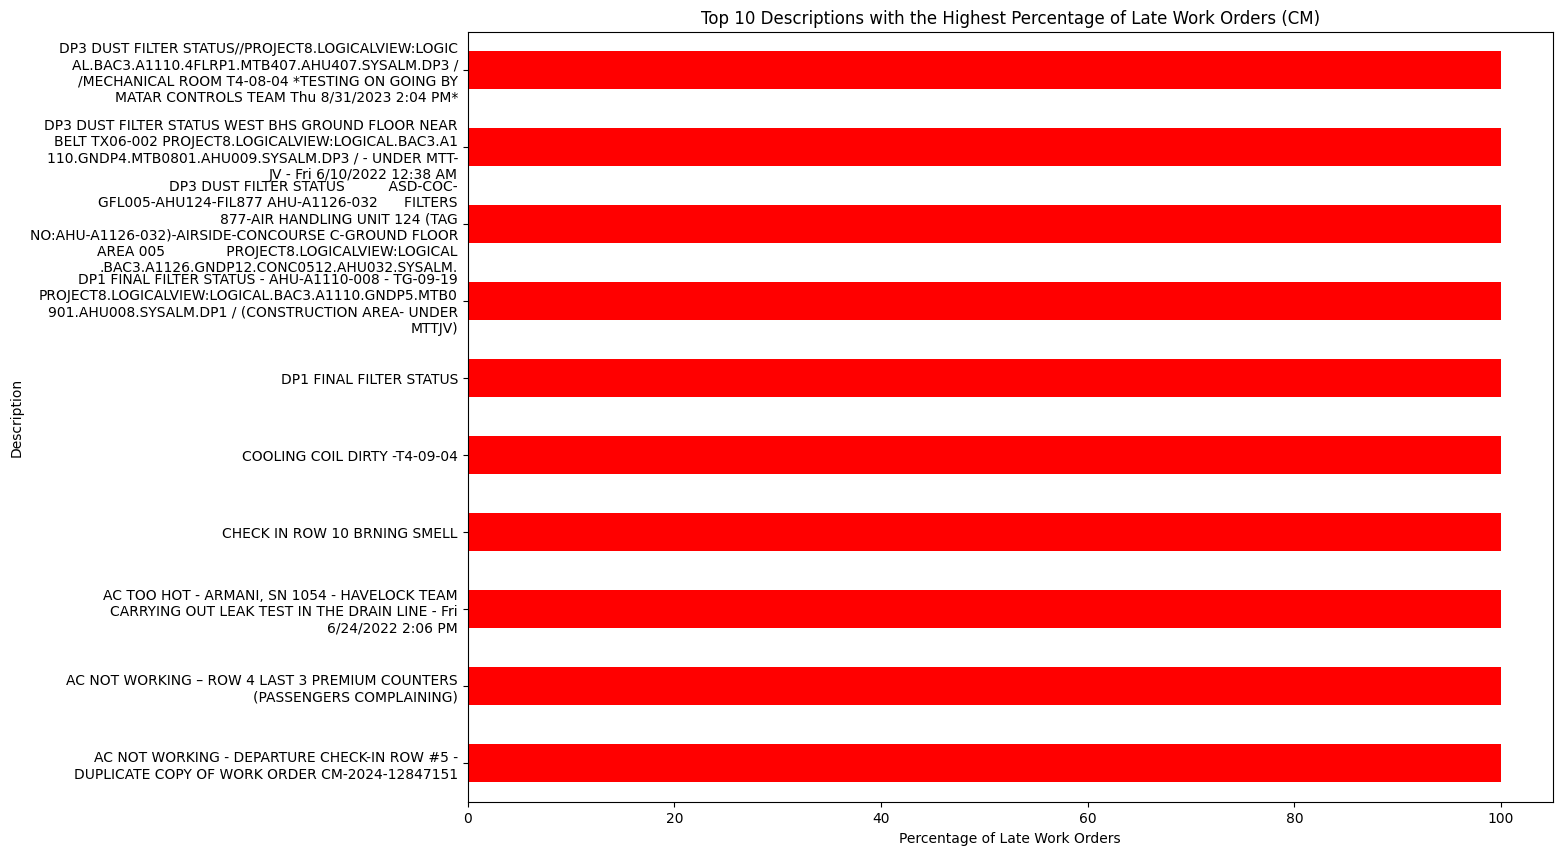

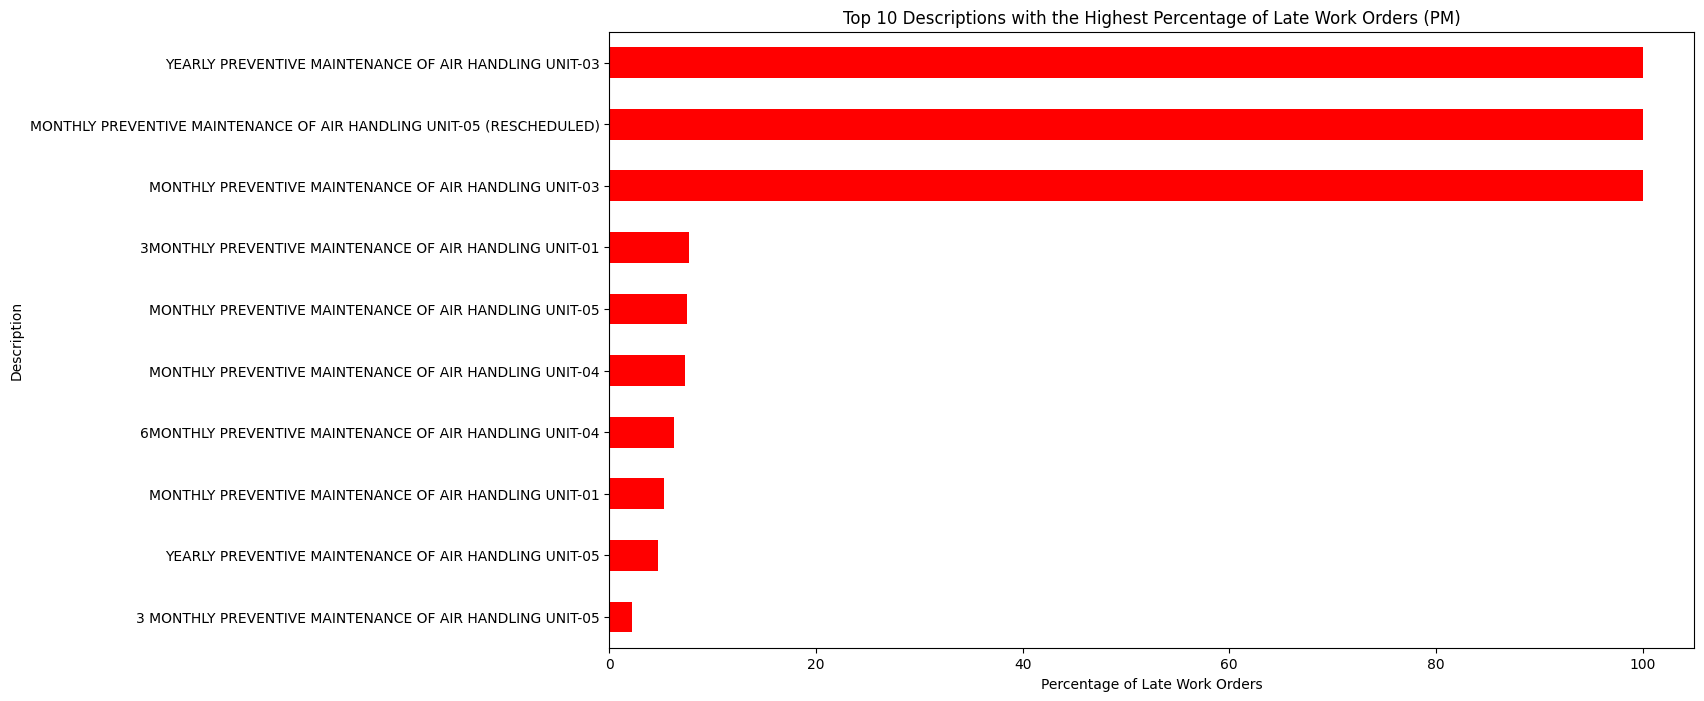

In [88]:
# Calculate the number of late work orders by description for CM
cm_late_work_orders_by_description = work_order_cm_df[work_order_cm_df['Efficiency Category'] == 'Late'].groupby('Description').size()

# Calculate the total number of work orders by description for CM
cm_total_work_orders_by_description = work_order_cm_df.groupby('Description').size()

# Calculate the percentage of late work orders for each description in CM
cm_late_percentage_by_description = (cm_late_work_orders_by_description / cm_total_work_orders_by_description) * 100

# Sort and select the top 10 descriptions with the highest percentage of late work orders
top_cm_late_descriptions = cm_late_percentage_by_description.sort_values(ascending=False).head(10).sort_values()

import matplotlib.pyplot as plt
import textwrap

# Wrap text function
def wrap_text(text, width=50):
    return textwrap.fill(text, width=width)

# Apply wrapping to the descriptions
wrapped_labels = [wrap_text(label) for label in top_cm_late_descriptions.index]

# Increase the figure size
plt.figure(figsize=(14, 10))

# Plot with wrapped labels
top_cm_late_descriptions.plot(kind='barh', color='red')

# Apply the wrapped labels to the y-axis
plt.yticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels)

plt.title('Top 10 Descriptions with the Highest Percentage of Late Work Orders (CM)')
plt.xlabel('Percentage of Late Work Orders')
plt.ylabel('Description')

plt.show()

# Repeat the same steps for PM

# Calculate the number of late work orders by description for PM
pm_late_work_orders_by_description = work_order_pm_df[work_order_pm_df['Efficiency Category'] == 'Late'].groupby('Description').size()

# Calculate the total number of work orders by description for PM
pm_total_work_orders_by_description = work_order_pm_df.groupby('Description').size()


# Calculate the percentage of late work orders for each description in PM
pm_late_percentage_by_description = (pm_late_work_orders_by_description / pm_total_work_orders_by_description) * 100

# Sort and select the top 10 descriptions with the highest percentage of late work orders
top_pm_late_descriptions = pm_late_percentage_by_description.sort_values(ascending=False).head(10).sort_values()

# Plot the top 10 late descriptions for PM
plt.figure(figsize=(14, 8))
top_pm_late_descriptions.plot(kind='barh', color='red')
plt.title('Top 10 Descriptions with the Highest Percentage of Late Work Orders (PM)')
plt.xlabel('Percentage of Late Work Orders')
plt.ylabel('Description')
plt.show()

In [89]:
# Cost Analysis

# Re-load the Excel files due to the previous error
spare_issued_pm_df = pd.read_excel('Spare_Issued_PM.xlsx')
spare_issued_cm_df = pd.read_excel('Spare_Issued_CM.xlsx')
work_order_cm_df = pd.read_excel('Work_Order_CM.xlsx')
work_order_pm_df = pd.read_excel('Work_Order_PM.xlsx')

# Aggregate the total maintenance cost by asset for CM
cm_cost_by_asset = spare_issued_cm_df.groupby('ASSET NUMBER')['TOTAL VALUE'].sum().sort_values(ascending=False)

# Aggregate the total maintenance cost by asset for PM
pm_cost_by_asset = spare_issued_pm_df.groupby('ASSET NUMBER')['TOTAL VALUE'].sum().sort_values(ascending=False)

# Display the top 10 most expensive assets for CM and PM
print("Top 10 most expensive assets in CM:")
print(cm_cost_by_asset.head(10))

print("\nTop 10 most expensive assets in PM:")
print(pm_cost_by_asset.head(10))

Top 10 most expensive assets in CM:
ASSET NUMBER
ASD-MTB-FOF06A-AHU172    72829.77
ASD-MTB-FOF008-AHU018    57630.87
ASD-MTB-FOF021-AHU186    53890.56
ASD-MTB-FOF009-AHU031    51467.40
ASD-MTB-GFL06A-AHU169    50448.92
ASD-MTB-FOF008-AHU030    50368.14
ASD-COB-GFL020-AHU082    49844.48
ASD-MTB-GFL06A-AHU171    49277.58
ASD-COB-GFL18A-AHU191    47579.36
ASD-COA-GFL003-AHU184    46964.24
Name: TOTAL VALUE, dtype: float64

Top 10 most expensive assets in PM:
ASSET NUMBER
ASD-MTB-GFL07A-AHU176    44414.96
ASD-COB-GFL18A-AHU191    41391.96
ASD-COA-GFL003-AHU183    33651.48
ASD-MTB-FOF06A-AHU173    32163.90
ASD-COA-GFL001-AHU066    30781.10
ASD-COB-GFL017-AHU086    28816.72
ASD-MTB-FOF07A-AHU180    28280.73
ASD-MTB-GFL06A-AHU169    27999.83
ASD-MTB-FOF07A-AHU179    27234.22
ASD-MTB-GFL06A-AHU170    25304.34
Name: TOTAL VALUE, dtype: float64


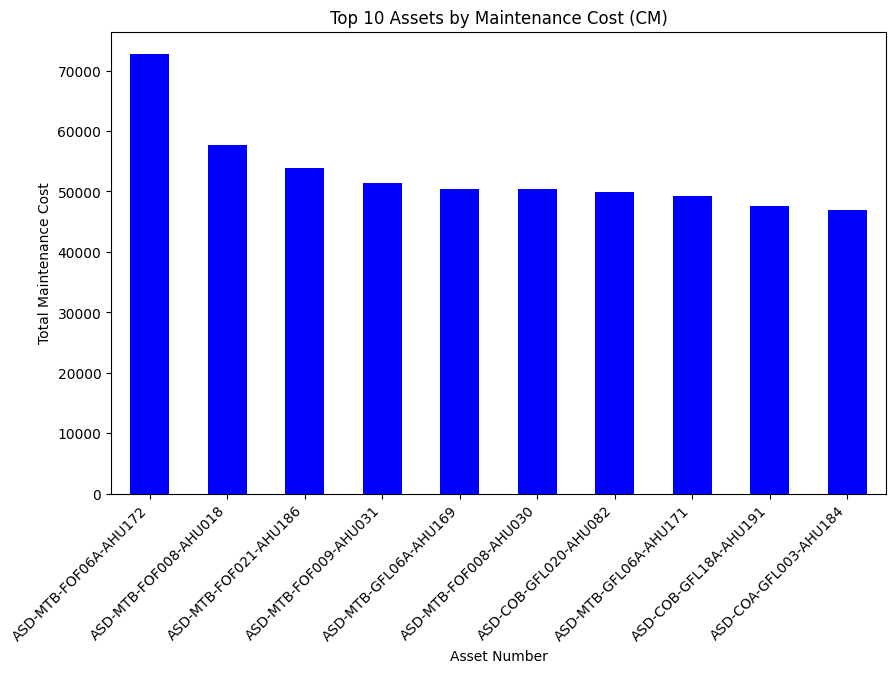

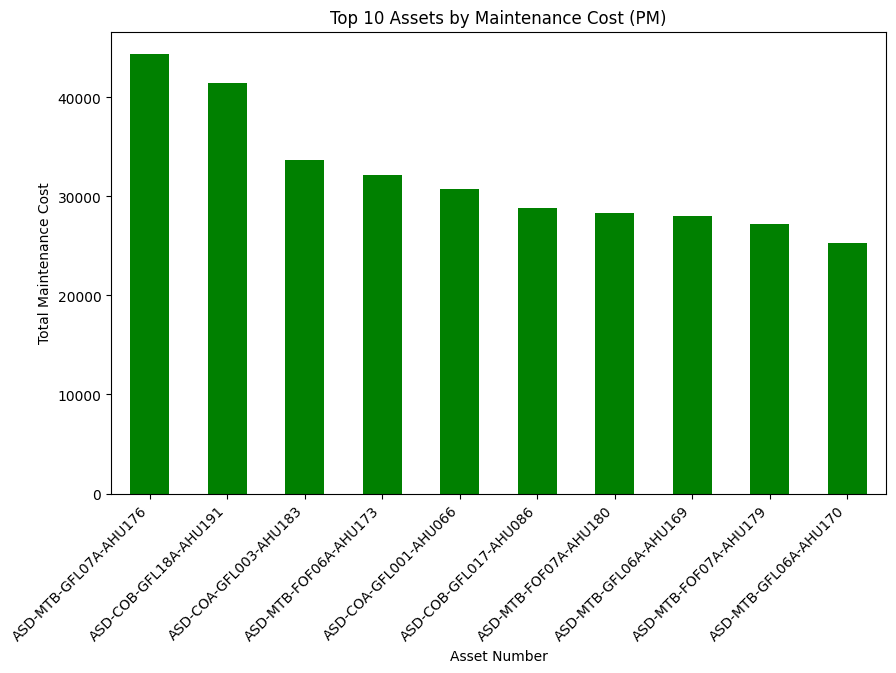

In [90]:
# Plot for CM costs
plt.figure(figsize=(10, 6))
cm_cost_by_asset.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Assets by Maintenance Cost (CM)')
plt.xlabel('Asset Number')
plt.ylabel('Total Maintenance Cost')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot for PM costs
plt.figure(figsize=(10, 6))
pm_cost_by_asset.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Assets by Maintenance Cost (PM)')
plt.xlabel('Asset Number')
plt.ylabel('Total Maintenance Cost')
plt.xticks(rotation=45, ha='right')
plt.show()

Top 10 most expensive assets overall:
ASSET NUMBER
ASD-MTB-FOF06A-AHU172    92932.91
ASD-COB-GFL18A-AHU191    88971.32
ASD-MTB-GFL06A-AHU169    78448.75
ASD-MTB-FOF021-AHU186    74959.31
ASD-MTB-GFL06A-AHU171    72072.52
ASD-COB-GFL020-AHU082    71979.24
ASD-MTB-FOF06A-AHU174    66638.77
ASD-MTB-GFL07A-AHU176    66332.89
ASD-MTB-FOF06A-AHU173    63526.78
ASD-COA-GFL001-AHU066    62690.56
Name: Total Cost, dtype: float64


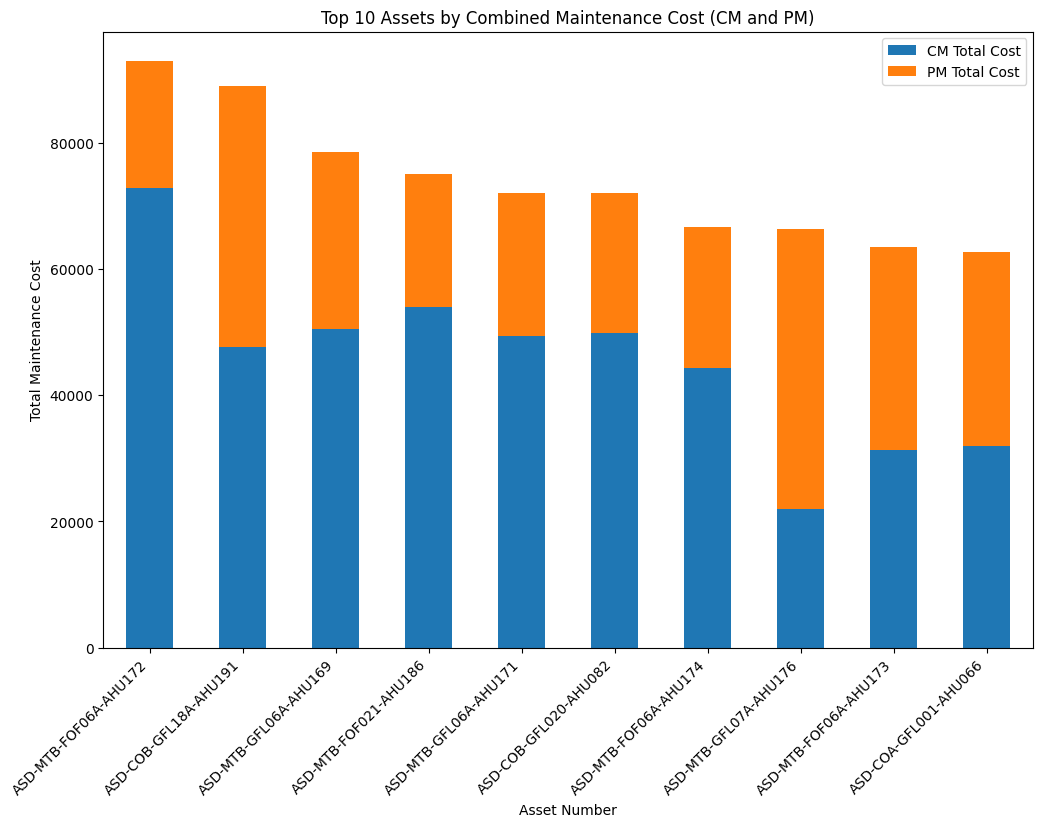

In [91]:
# Combine CM and PM costs into a single DataFrame for comparison
combined_cost_by_asset = pd.DataFrame({
    'CM Total Cost': cm_cost_by_asset,
    'PM Total Cost': pm_cost_by_asset
}).fillna(0)  # Fill NaN with 0 where an asset has costs in only one of CM or PM

# Calculate the total cost across both CM and PM
combined_cost_by_asset['Total Cost'] = combined_cost_by_asset['CM Total Cost'] + combined_cost_by_asset['PM Total Cost']

# Display the top 10 most expensive assets overall
print("Top 10 most expensive assets overall:")
print(combined_cost_by_asset['Total Cost'].sort_values(ascending=False).head(10))

# Plot comparison of CM and PM costs for the top 10 most expensive assets
top_combined_cost = combined_cost_by_asset.sort_values('Total Cost', ascending=False).head(10)

top_combined_cost[['CM Total Cost', 'PM Total Cost']].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 10 Assets by Combined Maintenance Cost (CM and PM)')
plt.xlabel('Asset Number')
plt.ylabel('Total Maintenance Cost')
plt.xticks(rotation=45, ha='right')
plt.show()